##  Customer Churn Prediction for a Telecommunication Company


###  Business Understanding 


#### Problem Statement 

Telecommunication companies face significant challenges with customer retention. The primary problem is to identify which customers are likely to churn (i.e., stop using the service) and understand the factors influencing this behavior. This insight will help in implementing targeted strategies to improve customer retention.



#### Goal and Objectives

#### Goal:

* To develop a predictive model that accurately identifies customers who are likely to churn

#### Objectives:

1. Analyze historical customer data to identify patterns and trends.
2. Identify key factors that influence customer churn.
3. Develop a classification model to predict the likelihood of customer churn.
4. Calculate the Customer Lifetime Value (CLV) for each customer.
5. Provide actionable insights and recommendations to reduce churn rates.

#### Stakeholders

#####  Primary Stakeholders:

* Marketing Team
* Custumer Retention Team
* Data Analytics Team
* Senior Management

#####  Secondary Stakeholders:

* Customer Service Team
* Sales Team
* IT Department

#### Key Metrics and Success Criteria
* Accurancy of the predictive model
* Precision and Recall to ensure the model identifies actual churners correctly
* ROC - AUC Score to evaluate model's performance
* Reduction in Churn Rate post -implementation of recommendations
* Increase in Customer lifeline Value (CLV) after targeted interventions

#### Features
- customerID
- gender
- SeniorCitizen
- Partner
- Dependents
- tenure
- PhoneService
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract
- PaperlessBilling
- PaymentMethod
- MonthlyCharges
- TotalCharges
- Churn



#### Hypothesis
- Null Hypothesis (H₀): There is no significant difference in the average monthly charges between customers who have churned and those who have not churned.

- Alternative Hypothesis (H₁): There is a significant difference in the average monthly charges between customers who have churned and those who have not churned.
​




#### Analytical Questions
1. What are the primary factors influencing customer churn?

By analyzing the relationships between various features (e.g., tenure, InternetService, Contract, MonthlyCharges, TotalCharges) and the Churn variable, you can identify the key drivers of customer churn. This information can help in developing targeted retention strategies.

2. How does the type of contract affect customer churn rates?

Examining the churn rates across different contract types (Month-to-month, One year, Two year) can reveal if customers with shorter-term contracts are more likely to churn compared to those with longer-term contracts. This insight can help in designing better contract options and incentives.

3. What is the impact of payment method on customer retention?

Analyzing the relationship between PaymentMethod (e.g., Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) and Churn can show if certain payment methods are associated with higher churn rates. This can guide decisions on promoting specific payment methods to improve retention.

4. How does the tenure of a customer correlate with their monthly charges and churn rate?

Investigating the correlation between tenure, MonthlyCharges, and Churn can provide insights into how long-term customers' billing patterns affect their likelihood to churn. This can help in identifying pricing strategies that encourage long-term customer retention.

5. Which internet service type is most preferred by customers, and how does it relate to churn?

Analyzing the distribution of InternetService (e.g., DSL, Fiber optic, No internet service) among customers and its relationship with Churn can highlight which service type is more popular and which has the highest churn rate. This can inform service improvements and marketing strategies.
By addressing these questions through data analysis, you can gain valuable insights into customer behavior and preferences, helping to make informed business decisions and improve customer satisfaction and retention.



#### Scope and Constraints

##### Scope:

* The analysis will focus on historical data provided by the telecommunication company.
* Development of a machine learning model to predict churn.
* Calculation and analysis of Customer Lifetime Value (CLV).
* Provide recommendations based on the findings.

##### Constraints:

* Availability and quality of historical data.
* Data privacy and security concerns.
* Limited by the features available in the dataset.

#### Additional Information

##### Data Sources:

* Customer demographics
* Usage patterns (call duration, data usage)
* Service logs (complaints, outages)
* Payment history
* Customer feedback and survey responses

#### Tools and Technologies

* Data analysis: Python, Pandas, NumPy
* Data visualization: Matplotlib, Seaborn, Tableau
* Machine learning: Scikit-learn, XGBoost
* Data preprocessing: MinMaxScaler, LabelEncoder

#### Deliverables:

* A detailed report on factors influencing customer churn.
* A predictive model with performance metrics.
* Customer Lifetime Value (CLV) calculations.
* Actionable insights and recommendations.
* Visualizations and dashboards for key metrics.

###  Data Understanding

####  Importations 

In [2546]:
# Data Manipulation packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Database connectivity
import pyodbc
from sqlalchemy import create_engine

# Managing environment variables
from dotenv import dotenv_values

# Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#### Load Dataset

- First Data set

In [2547]:
# Load environment variable from .env file into a directory
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")


In [2548]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [2549]:
# This will connect to the server and might take a few seconds to be complete. 
connection = pyodbc.connect(connection_string)

In [2550]:
# Now the sql query to get the data is what what you see below. 

#query = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"

# select data from 2020

query = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"

data1 = pd.read_sql(query, connection)
data1.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_12236\4017826265.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data1 = pd.read_sql(query, connection)


customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG  Female          False     True       False       1   
1  5575-GNVDE    Male          False    False       False      34   
2  3668-QPYBK    Male          False    False       False       2   
3  7795-CFOCW    Male          False    False       False      45   
4  9237-HQITU  Female          False    False       False       2   

   PhoneService MultipleLines InternetService OnlineSecurity  ...  \
0         False          None             DSL          False  ...   
1          True         False             DSL           True  ...   
2          True         False             DSL           True  ...   
3         False          None             DSL           True  ...   
4          True         False     Fiber optic          False  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0            False       False       False           False  Month-to-month   
1             True       False       False           False        One year   
2            False       False       False           False  Month-to-month   
3             True        True       False           False        One year   
4            False       False       False           False  Month-to-month   

  PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0             True           Electronic check      29.850000     29.850000   
1            False               Mailed check      56.950001   1889.500000   
2             True               Mailed check      53.849998    108.150002   
3            False  Bank transfer (automatic)      42.299999   1840.750000   
4             True           Electronic check      70.699997    151.649994   

   Churn  
0  False  
1  False  
2   True  
3  False  
4   True  

[5 rows x 21 columns]

In [2551]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [2552]:
data1.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

- Load Second Data set

In [2553]:
# Accessing the second data set, downlaoded from Git-hub into data folder. 

data2 = pd.read_csv('../data/LP2_Telco-churn-second-2000.csv')

data2.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  5600-PDUJF    Male              0      No         No       6          Yes   
1  8292-TYSPY    Male              0      No         No      19          Yes   
2  0567-XRHCU  Female              0     Yes        Yes      69           No   
3  1867-BDVFH    Male              0     Yes        Yes      11          Yes   
4  2067-QYTCF  Female              0     Yes         No      64          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0                No             DSL             No  ...               No   
1                No             DSL             No  ...              Yes   
2  No phone service             DSL            Yes  ...              Yes   
3               Yes     Fiber optic             No  ...               No   
4               Yes     Fiber optic             No  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes          No              No  Month-to-month              Yes   
1         Yes          No              No  Month-to-month              Yes   
2          No          No             Yes        Two year              Yes   
3          No          No              No  Month-to-month              Yes   
4         Yes         Yes             Yes  Month-to-month              Yes   

             PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Credit card (automatic)          49.50         312.7    No  
1  Credit card (automatic)          55.00        1046.5   Yes  
2  Credit card (automatic)          43.95        2960.1    No  
3         Electronic check          74.35         834.2   Yes  
4         Electronic check         111.15        6953.4    No  

[5 rows x 21 columns]

In [2554]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [2555]:
data2.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [2556]:
data2 = pd.DataFrame(data2)

# Select columns of type 'object' (string) or 'category'
categorical_columns = data2.select_dtypes(include=['object', 'category']).columns

# Display the categorical columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [2557]:
# concatenating all the dataframes together
df = pd.concat([data1, data2], axis=0)
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0    True      False       1   
1     5575-GNVDE    Male              0   False      False      34   
2     3668-QPYBK    Male              0   False      False       2   
3     7795-CFOCW    Male              0   False      False      45   
4     9237-HQITU  Female              0   False      False       2   
...          ...     ...            ...     ...        ...     ...   
2038  6840-RESVB    Male              0     Yes        Yes      24   
2039  2234-XADUH  Female              0     Yes        Yes      72   
2040  4801-JZAZL  Female              0     Yes        Yes      11   
2041  8361-LTMKD    Male              1     Yes         No       4   
2042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0           False              None             DSL          False  ...   
1            True             False             DSL           True  ...   
2            True             False             DSL           True  ...   
3           False              None             DSL           True  ...   
4            True             False     Fiber optic          False  ...   
...           ...               ...             ...            ...  ...   
2038          Yes               Yes             DSL            Yes  ...   
2039          Yes               Yes     Fiber optic             No  ...   
2040           No  No phone service             DSL            Yes  ...   
2041          Yes               Yes     Fiber optic             No  ...   
2042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               False       False       False           False  Month-to-month   
1                True       False       False           False        One year   
2               False       False       False           False  Month-to-month   
3                True        True       False           False        One year   
4               False       False       False           False  Month-to-month   
...               ...         ...         ...             ...             ...   
2038              Yes         Yes         Yes             Yes        One year   
2039              Yes          No         Yes             Yes        One year   
2040               No          No          No              No  Month-to-month   
2041               No          No          No              No  Month-to-month   
2042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                True           Electronic check      29.850000         29.85   
1               False               Mailed check      56.950001        1889.5   
2                True               Mailed check      53.849998    108.150002   
3               False  Bank transfer (automatic)      42.299999       1840.75   
4                True           Electronic check      70.699997    151.649994   
...               ...                        ...            ...           ...   
2038              Yes               Mailed check      84.800000        1990.5   
2039              Yes    Credit card (automatic)     103.200000        7362.9   
2040              Yes           Electronic check      29.600000        346.45   
2041              Yes               Mailed check      74.400000         306.6   
2042              Yes  Bank transfer (automatic)     105.650000        6844.5   

      Churn  
0     False  
1     False  
2      True  
3     False  
4      True  
...     ...  
2038     No  
2039     No  
2040     No  
2041    Yes  
2042     No  

[5043 rows x 21 columns]

#### EDA

* 1. Data Quality Assessment & Exploring data (info, duplicated, null values, describe)

In [2558]:
# Displaying the top 5 observations in dataset
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0    True      False       1        False   
1  5575-GNVDE    Male              0   False      False      34         True   
2  3668-QPYBK    Male              0   False      False       2         True   
3  7795-CFOCW    Male              0   False      False      45        False   
4  9237-HQITU  Female              0   False      False       2         True   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0          None             DSL          False  ...            False   
1         False             DSL           True  ...             True   
2         False             DSL           True  ...            False   
3          None             DSL           True  ...             True   
4         False     Fiber optic          False  ...            False   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0       False       False           False  Month-to-month             True   
1       False       False           False        One year            False   
2       False       False           False  Month-to-month             True   
3        True       False           False        One year            False   
4       False       False           False  Month-to-month             True   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check      29.850000         29.85  False  
1               Mailed check      56.950001        1889.5  False  
2               Mailed check      53.849998    108.150002   True  
3  Bank transfer (automatic)      42.299999       1840.75  False  
4           Electronic check      70.699997    151.649994   True  

[5 rows x 21 columns]

In [2559]:
# Displaying the last 5 observations of the dataset
df.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
2038  6840-RESVB    Male              0     Yes        Yes      24   
2039  2234-XADUH  Female              0     Yes        Yes      72   
2040  4801-JZAZL  Female              0     Yes        Yes      11   
2041  8361-LTMKD    Male              1     Yes         No       4   
2042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
2038          Yes               Yes             DSL            Yes  ...   
2039          Yes               Yes     Fiber optic             No  ...   
2040           No  No phone service             DSL            Yes  ...   
2041          Yes               Yes     Fiber optic             No  ...   
2042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
2038              Yes         Yes         Yes             Yes        One year   
2039              Yes          No         Yes             Yes        One year   
2040               No          No          No              No  Month-to-month   
2041               No          No          No              No  Month-to-month   
2042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
2038              Yes               Mailed check          84.80        1990.5   
2039              Yes    Credit card (automatic)         103.20        7362.9   
2040              Yes           Electronic check          29.60        346.45   
2041              Yes               Mailed check          74.40         306.6   
2042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
2038    No  
2039    No  
2040    No  
2041   Yes  
2042    No  

[5 rows x 21 columns]

In [2560]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

In [2561]:
# claculating the percentage of missing value

(df.isnull().sum()/len(df))*100

customerID           0.000000
gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
tenure               0.000000
PhoneService         0.000000
MultipleLines        5.334127
InternetService      0.000000
OnlineSecurity      12.908983
OnlineBackup        12.908983
DeviceProtection    12.908983
TechSupport         12.908983
StreamingTV         12.908983
StreamingMovies     12.908983
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.099147
Churn                0.019829
dtype: float64

In [2562]:
# Define the standardization function
def standardize_value(value):
    if value is True or value == 'Yes':
        return 'Yes'
    elif value is False or value == 'No' or value == 'None':
        return 'No'
    elif value == 'No internet service' or value == 'No phone service':
        return value
    else:
        return 'Unknown'
 
# List of columns to standardize
columns_to_standardize = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn'
]
 
# Apply the standardization function to each column
for column in columns_to_standardize:
    df[column] = df[column].apply(standardize_value)
 
# Confirm the changes
for column in columns_to_standardize:
    unique_values_after = df[column].unique()
    print(f'Unique values in {column} after standardization:', unique_values_after)
    print(df[column].value_counts())
    print()

Unique values in Partner after standardization: ['Yes' 'No']
Partner
No     2585
Yes    2458
Name: count, dtype: int64

Unique values in Dependents after standardization: ['No' 'Yes']
Dependents
No     3482
Yes    1561
Name: count, dtype: int64

Unique values in PhoneService after standardization: ['No' 'Yes']
PhoneService
Yes    4554
No      489
Name: count, dtype: int64

Unique values in MultipleLines after standardization: ['Unknown' 'No' 'Yes' 'No phone service']
MultipleLines
No                  2424
Yes                 2130
Unknown              269
No phone service     220
Name: count, dtype: int64

Unique values in OnlineSecurity after standardization: ['No' 'Yes' 'Unknown' 'No internet service']
OnlineSecurity
No                     2507
Yes                    1456
Unknown                 651
No internet service     429
Name: count, dtype: int64

Unique values in OnlineBackup after standardization: ['Yes' 'No' 'Unknown' 'No internet service']
OnlineBackup
No                    

In [2563]:
# Convert 'TotalCharges' to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing 'TotalCharges' with 'MonthlyCharges'
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)

# Display the updated DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

C:\Users\pc\AppData\Local\Temp\ipykernel_12236\8810283.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)


In [2564]:
# Change TotalCharges from object to float

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.head(20)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   7590-VHVEG  Female              0     Yes         No       1           No   
1   5575-GNVDE    Male              0      No         No      34          Yes   
2   3668-QPYBK    Male              0      No         No       2          Yes   
3   7795-CFOCW    Male              0      No         No      45           No   
4   9237-HQITU  Female              0      No         No       2          Yes   
5   9305-CDSKC  Female              0      No         No       8          Yes   
6   1452-KIOVK    Male              0      No        Yes      22          Yes   
7   6713-OKOMC  Female              0      No         No      10           No   
8   7892-POOKP  Female              0     Yes         No      28          Yes   
9   6388-TABGU    Male              0      No        Yes      62          Yes   
10  9763-GRSKD    Male              0     Yes        Yes      13          Yes   
11  7469-LKBCI    Male              0      No         No      16          Yes   
12  8091-TTVAX    Male              0     Yes         No      58          Yes   
13  0280-XJGEX    Male              0      No         No      49          Yes   
14  5129-JLPIS    Male              0      No         No      25          Yes   
15  3655-SNQYZ  Female              0     Yes        Yes      69          Yes   
16  8191-XWSZG  Female              0      No         No      52          Yes   
17  9959-WOFKT    Male              0      No        Yes      71          Yes   
18  4190-MFLUW  Female              0     Yes        Yes      10          Yes   
19  4183-MYFRB  Female              0      No         No      21          Yes   

   MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0        Unknown             DSL             No  ...               No   
1             No             DSL            Yes  ...              Yes   
2             No             DSL            Yes  ...               No   
3        Unknown             DSL            Yes  ...              Yes   
4             No     Fiber optic             No  ...               No   
5            Yes     Fiber optic             No  ...              Yes   
6            Yes     Fiber optic             No  ...               No   
7        Unknown             DSL            Yes  ...               No   
8            Yes     Fiber optic             No  ...              Yes   
9             No             DSL            Yes  ...               No   
10            No             DSL            Yes  ...               No   
11            No              No        Unknown  ...          Unknown   
12           Yes     Fiber optic             No  ...              Yes   
13           Yes     Fiber optic             No  ...              Yes   
14            No     Fiber optic            Yes  ...              Yes   
15           Yes     Fiber optic            Yes  ...              Yes   
16            No              No        Unknown  ...          Unknown   
17           Yes     Fiber optic            Yes  ...              Yes   
18            No             DSL             No  ...              Yes   
19            No     Fiber optic             No  ...              Yes   

   TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0           No          No              No  Month-to-month              Yes   
1           No          No              No        One year               No   
2           No          No              No  Month-to-month              Yes   
3          Yes          No              No        One year               No   
4           No          No              No  Month-to-month              Yes   
5           No         Yes             Yes  Month-to-month              Yes   
6           No         Yes              No  Month-to-month              Yes   
7           No          No              No  Month-to-month               No   
8          Yes         Yes             Yes  Month-to-mont

In [2565]:
df.nunique()

customerID          5043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          4
InternetService        3
OnlineSecurity         4
OnlineBackup           4
DeviceProtection       4
TechSupport            4
StreamingTV            4
StreamingMovies        4
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      2069
TotalCharges        4869
Churn                  3
dtype: int64

In [2566]:
# Check for duplicates in the 'customerID' column
duplicates_customerID = df[df.duplicated(subset='customerID')]

# Print the duplicated rows if there are any
if not duplicates_customerID.empty:
    print("Duplicate customerID rows:")
    print(duplicates_customerID)
else:
    print("No duplicate customerID rows found.")


No duplicate customerID rows found.


In [2567]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [2568]:
# claculating the percentage of missing value

(df.isnull().sum()/len(df))*100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [2569]:
df.describe().T

count         mean          std        min         25%  \
SeniorCitizen   5043.0     0.162403     0.368857   0.000000    0.000000   
tenure          5043.0    32.576641    24.529807   0.000000    9.000000   
MonthlyCharges  5043.0    65.090214    30.068133  18.400000   35.775000   
TotalCharges    5043.0  2298.488381  2269.455293  18.799999  415.724997   

                        50%          75%          max  
SeniorCitizen      0.000000     0.000000     1.000000  
tenure            29.000000    56.000000    72.000000  
MonthlyCharges    70.550003    90.050003   118.650002  
TotalCharges    1398.599976  3857.575073  8670.100000

In [2570]:
df.describe(include= 'object').T

count unique               top  freq
customerID        5043   5043        3186-AJIEK     1
gender            5043      2              Male  2559
Partner           5043      2                No  2585
Dependents        5043      2                No  3482
PhoneService      5043      2               Yes  4554
MultipleLines     5043      4                No  2424
InternetService   5043      3       Fiber optic  2248
OnlineSecurity    5043      4                No  2507
OnlineBackup      5043      4                No  2231
DeviceProtection  5043      4                No  2219
TechSupport       5043      4                No  2472
StreamingTV       5043      4                No  2018
StreamingMovies   5043      4               Yes  1982
Contract          5043      3    Month-to-month  2744
PaperlessBilling  5043      2               Yes  2996
PaymentMethod     5043      4  Electronic check  1700
Churn             5043      3                No  3706

In [2571]:
columns = df.columns
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

- Seperating Numerical and Categorical variables for easy analysis

In [2572]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Numerical Variables:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


- EDA Univariate Analysis

- In the below fig, a histogram and box plot is used to show the pattern of the variables, as some variables have skewness and outliers.

SeniorCitizen
Skew : 1.83


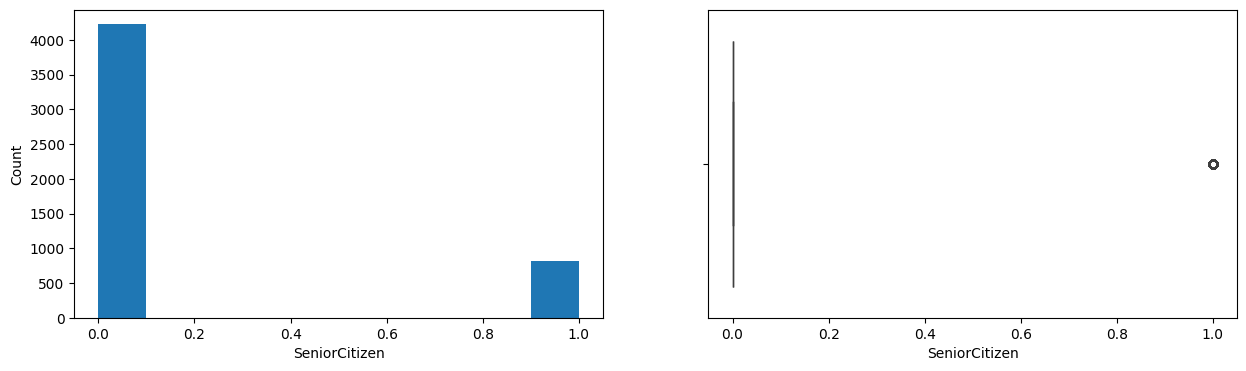

tenure
Skew : 0.23


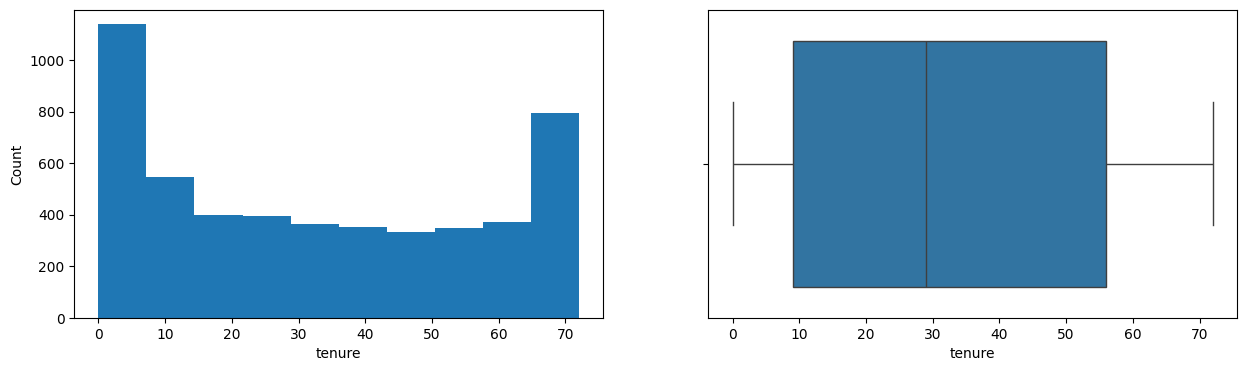

MonthlyCharges
Skew : -0.24


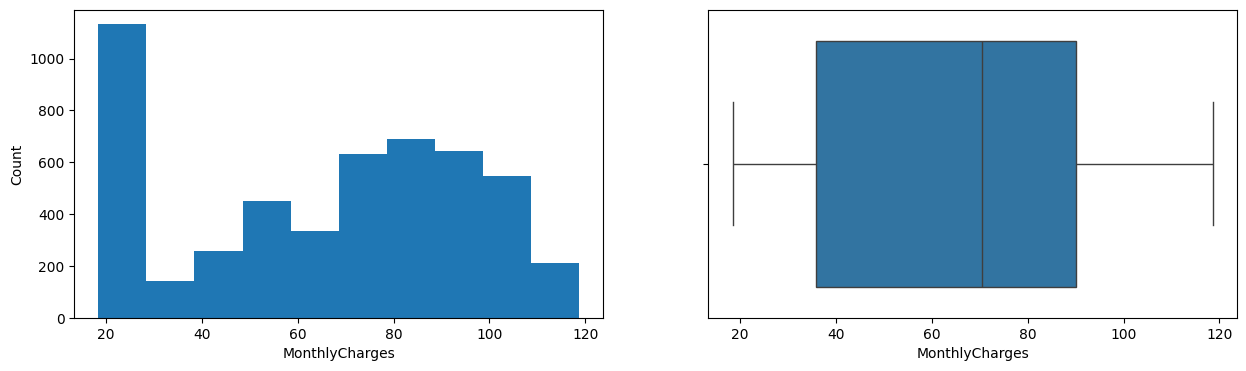

TotalCharges
Skew : 0.95


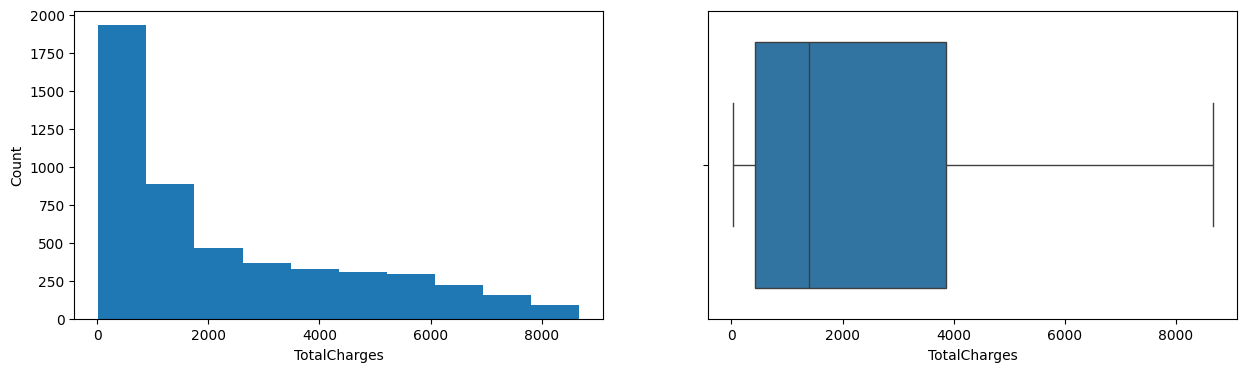

In [2573]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('Count')
    plt.xlabel(col)  # Set x-axis label for histogram
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.xlabel(col)  # Set x-axis label for box plot
    plt.show()


 


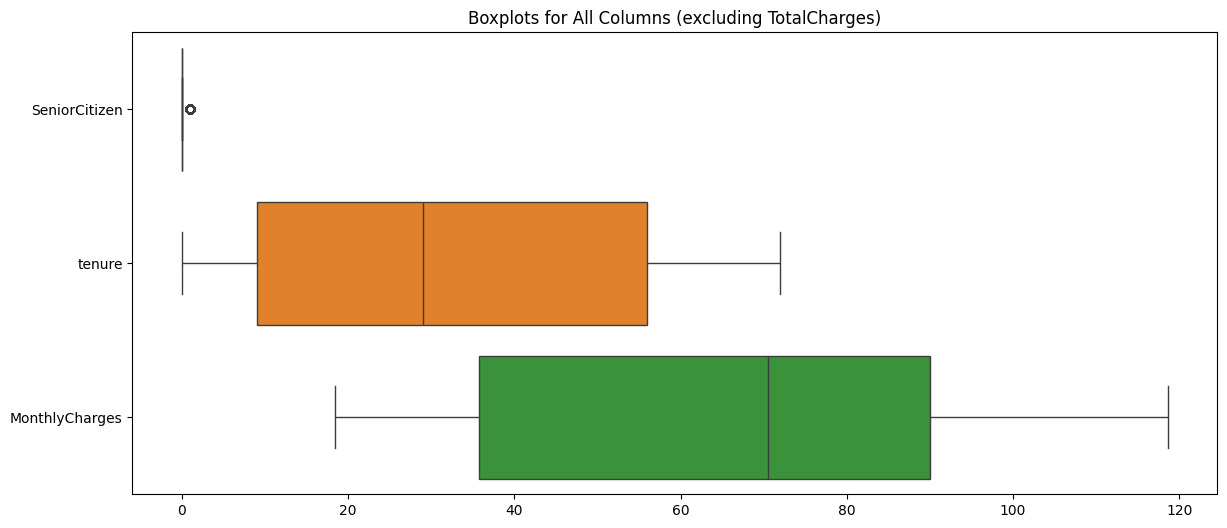

In [2574]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df.drop(['TotalCharges'], axis=1), orient='h')
plt.title('Boxplots for All Columns (excluding TotalCharges)')
plt.show()

- Categorical variables are being visualized using Pie Charts and Histogram

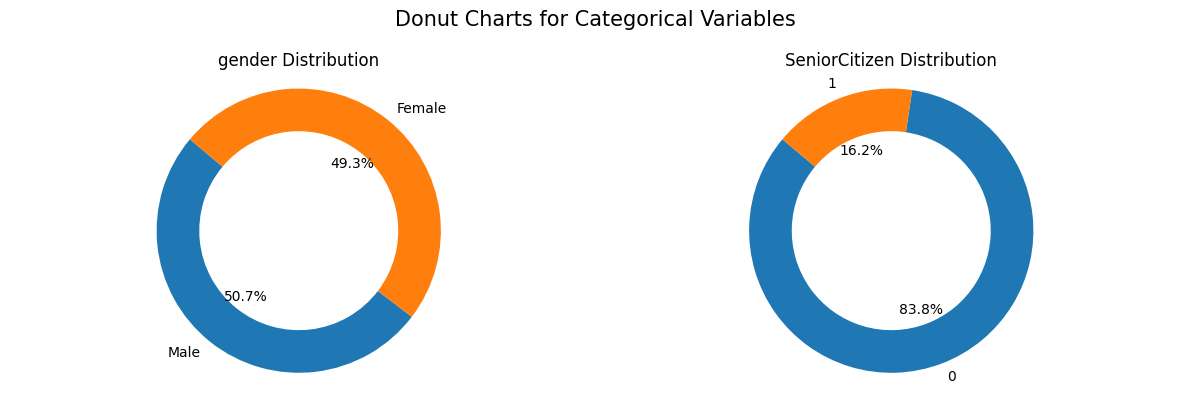

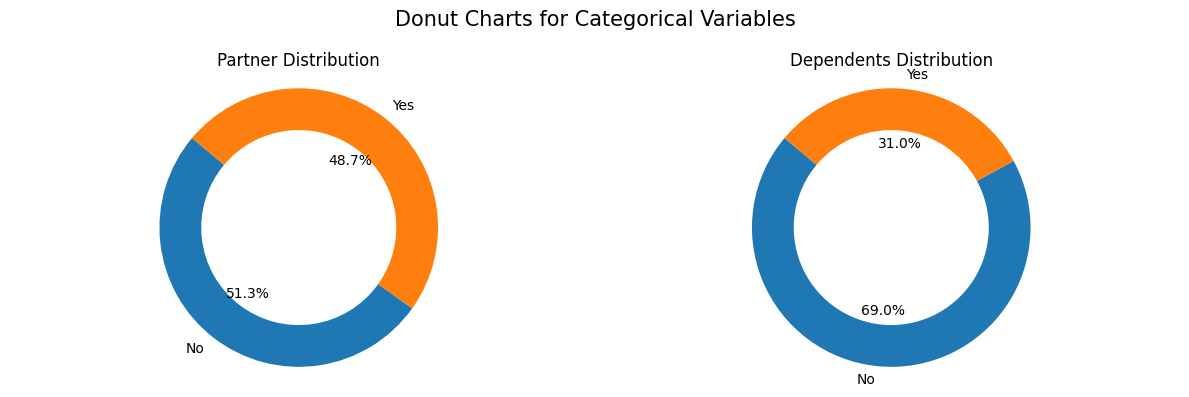

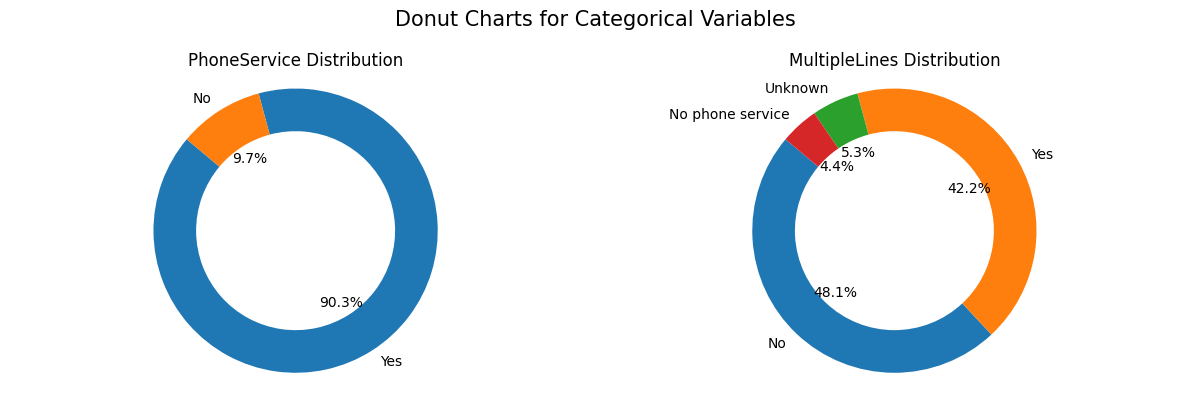

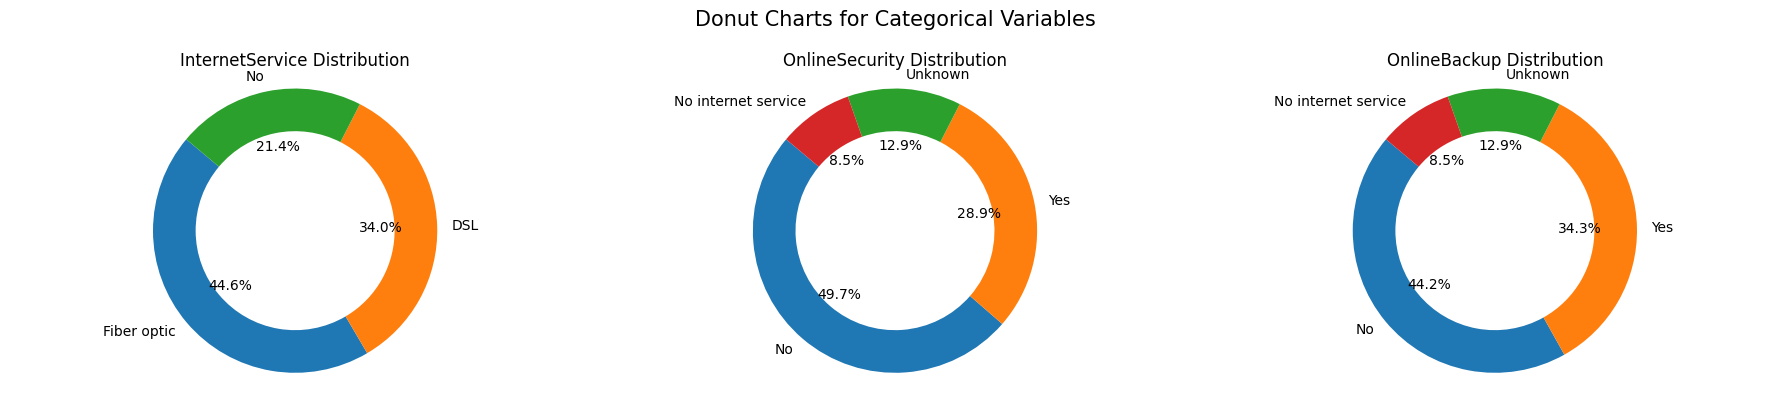

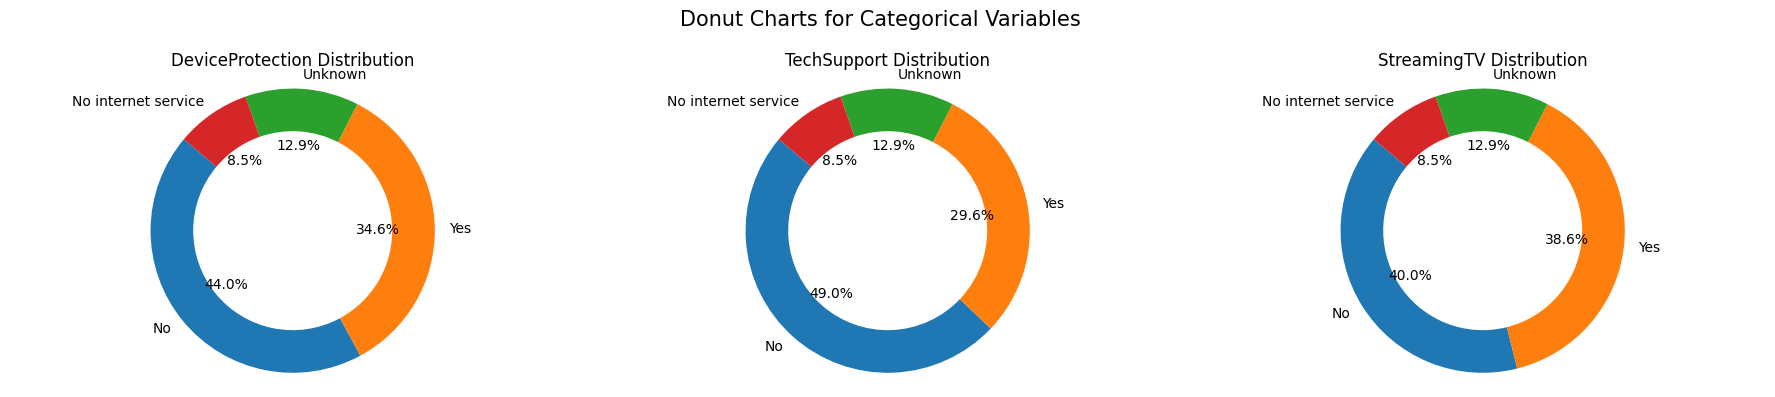

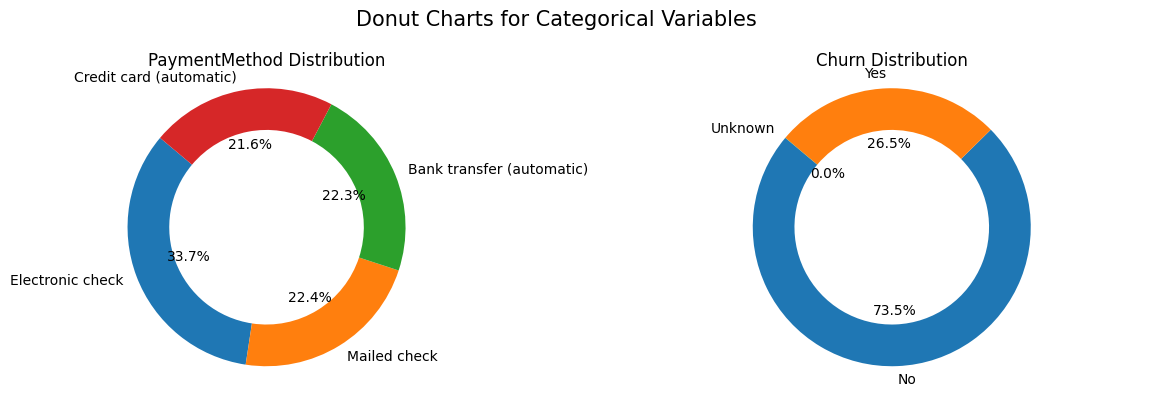

In [2575]:
# Define the pairs or threes of categorical columns
cat_cols_pairs = [
    ('gender', 'SeniorCitizen'), 
    ('Partner', 'Dependents'), 
    ('PhoneService', 'MultipleLines'),
    ('InternetService', 'OnlineSecurity', 'OnlineBackup'),
    ('DeviceProtection', 'TechSupport', 'StreamingTV'),
    ('PaymentMethod', 'Churn')
]

# Plotting donut charts for pairs or threes of categorical variables
for cols in cat_cols_pairs:
    fig, axs = plt.subplots(1, len(cols), figsize=(6 * len(cols), 4))
    fig.suptitle('Donut Charts for Categorical Variables', fontsize=15)
    
    for i, col in enumerate(cols):
        data = df[col].value_counts()
        axs[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
        axs[i].set_title(f'{col} Distribution')
        axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.tight_layout()
    plt.show()

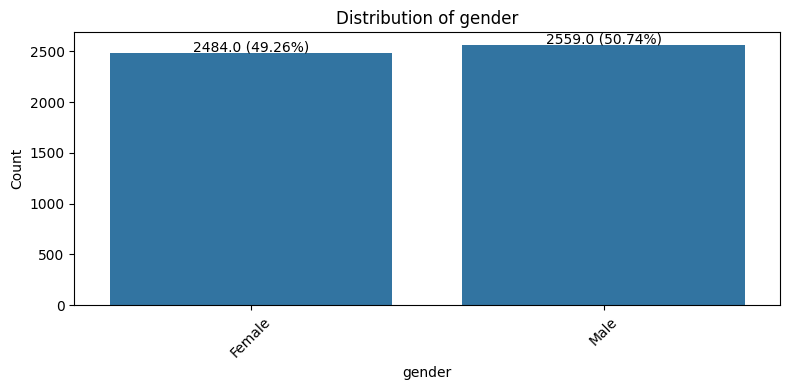

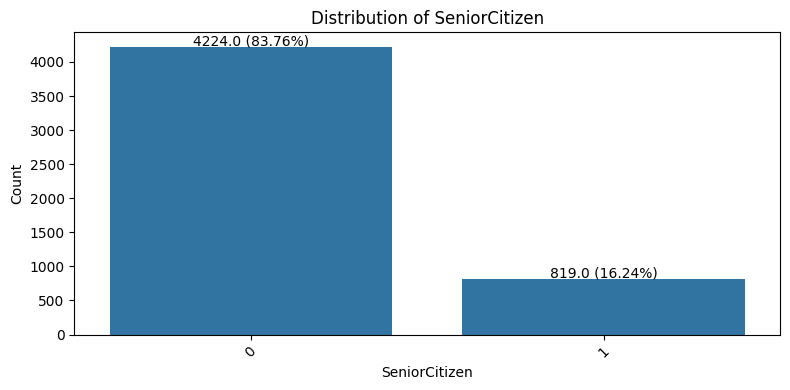

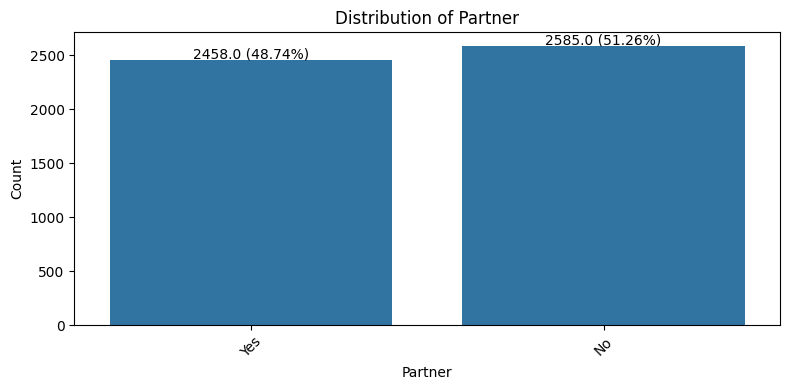

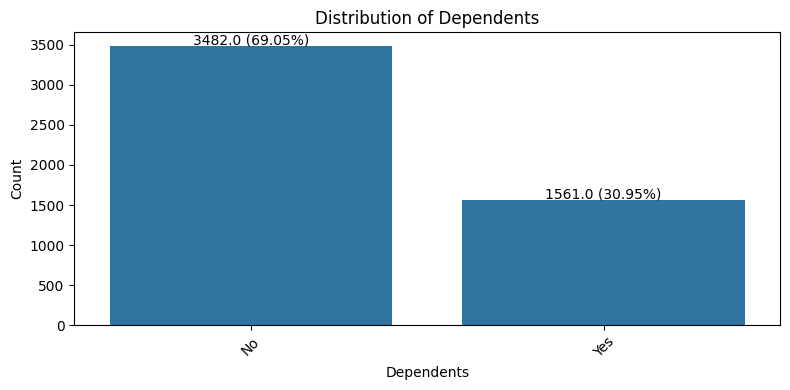

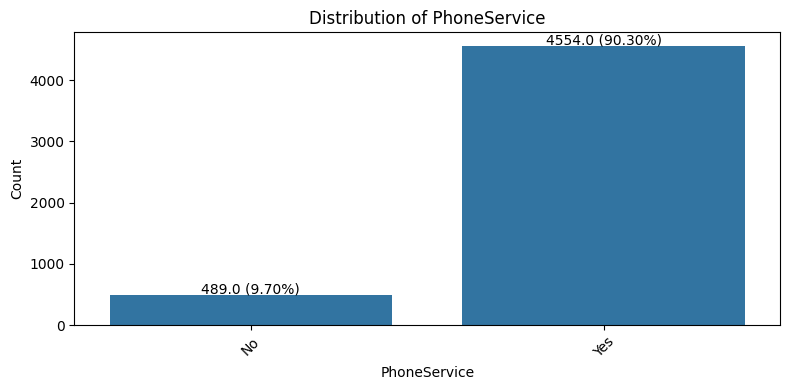

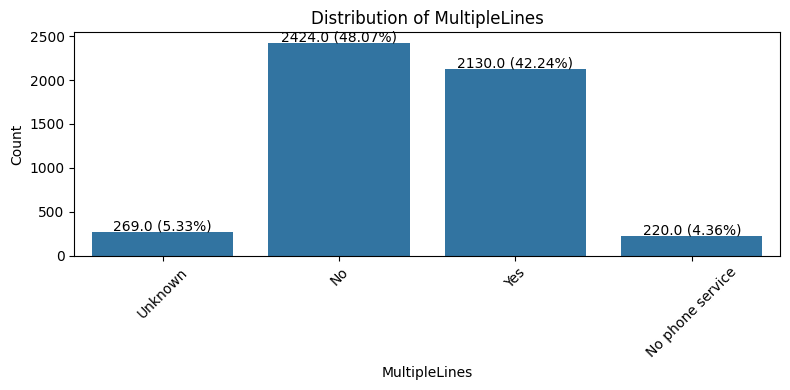

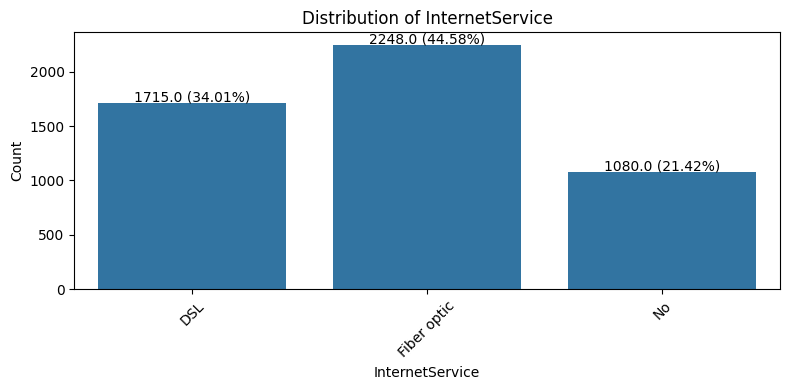

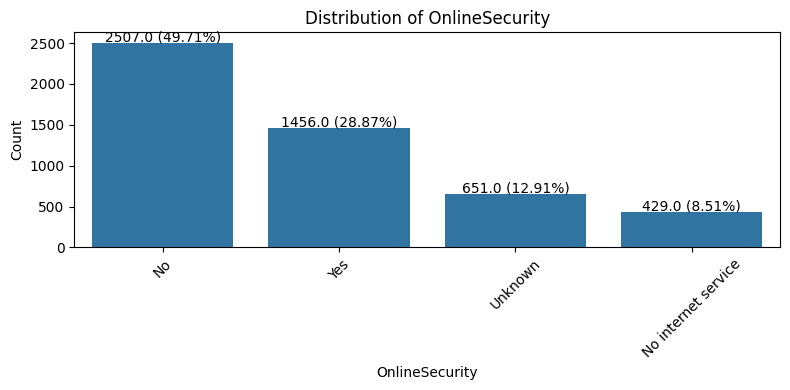

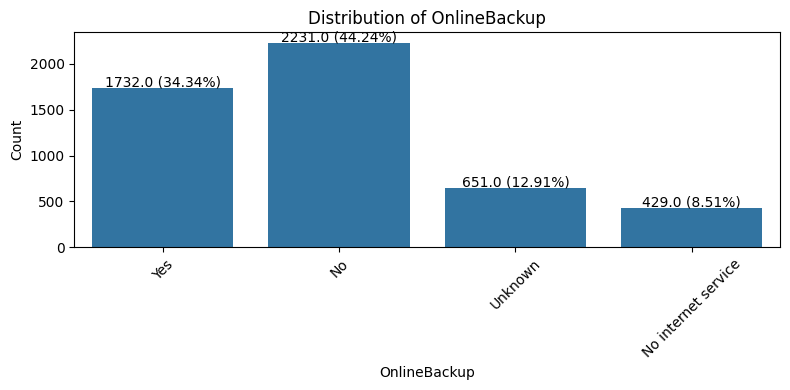

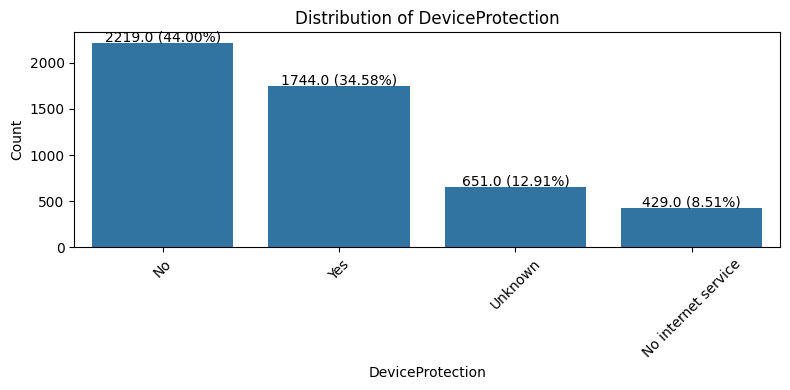

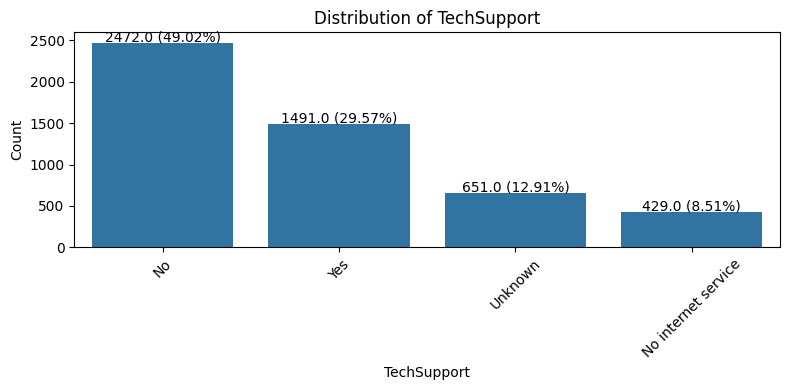

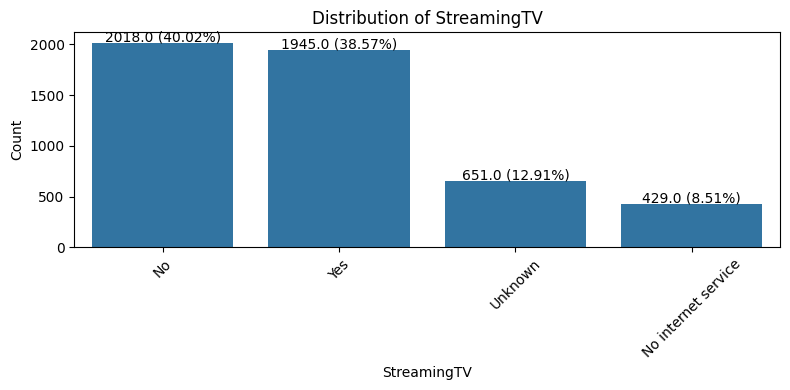

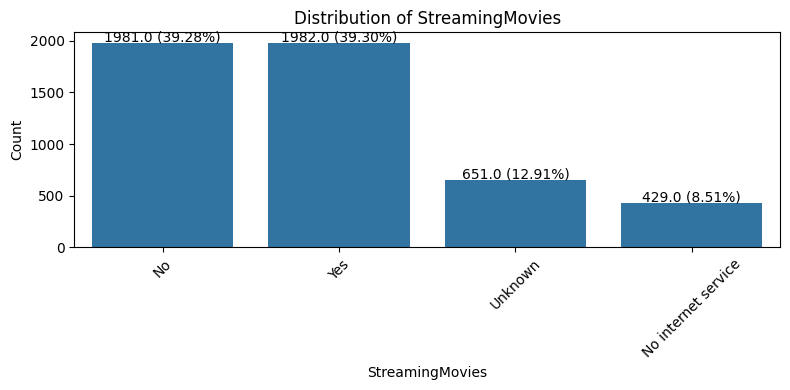

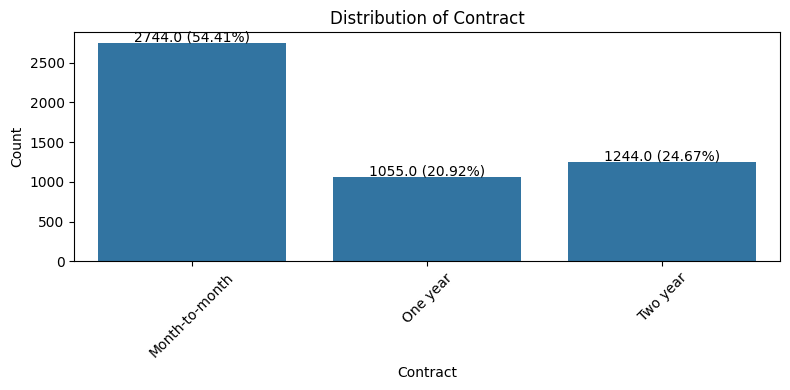

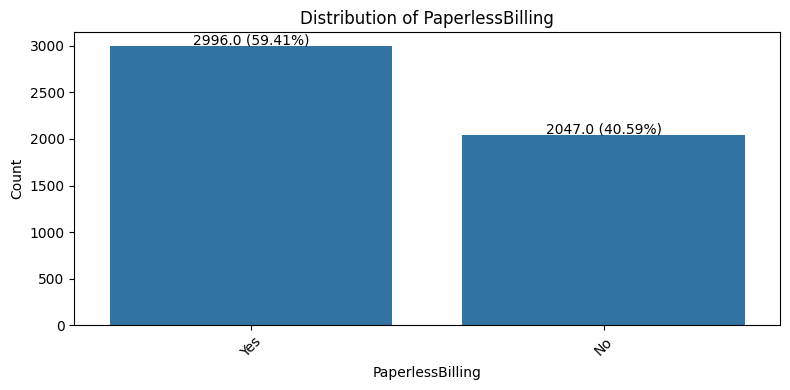

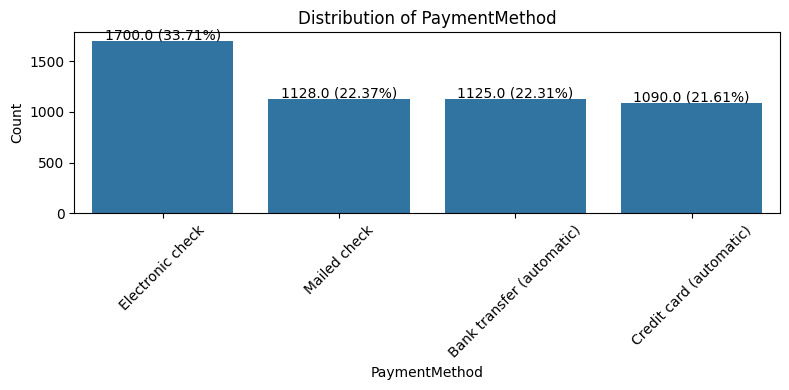

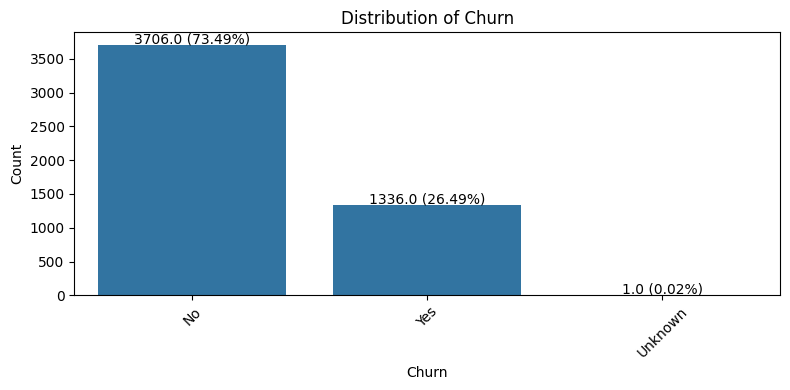

In [2576]:

# List of categorical columns
cat_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Function to add labels with numbers and percentages to the plots
def add_labels(ax, total_count):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()} ({p.get_height()/total_count*100:.2f}%)', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 4), textcoords='offset points')

# Plotting univariate distributions for categorical variables
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    # Add labels with numbers and percentages
    add_labels(ax, df.shape[0])
    
    plt.tight_layout()
    plt.show()




- Bi-variate Analysis 

<Figure size 1300x1700 with 0 Axes>

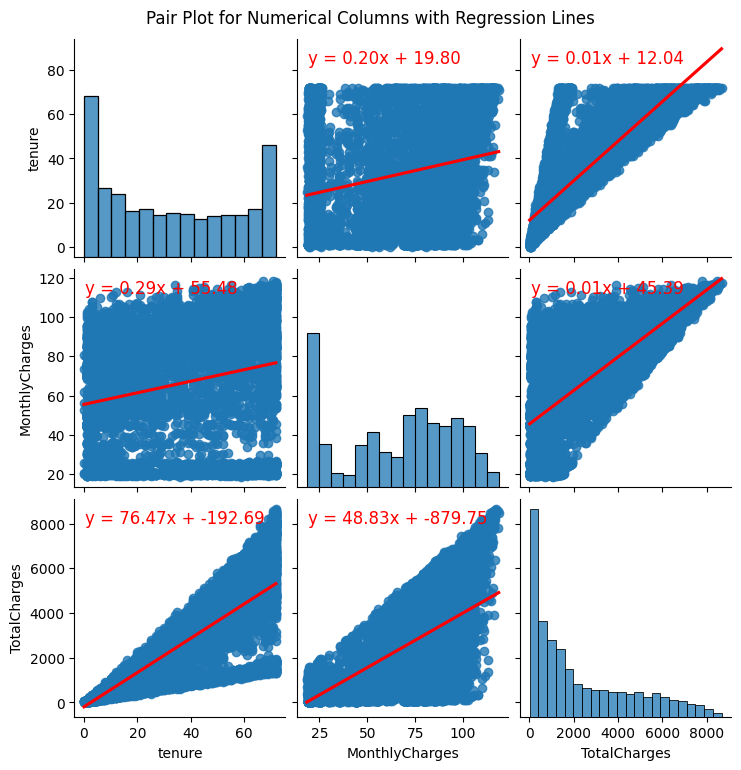

In [2577]:
# List of numerical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Pair plot to visualize all pairwise relationships with regression lines
plt.figure(figsize=(13, 17))
pair_plot = sns.pairplot(df[num_cols], kind='reg', plot_kws={'ci': None, 'line_kws': {'color': 'red'}})

# Add equations to each plot
for i, ax in enumerate(pair_plot.axes.flatten()):
    if ax is None:
        continue
    
    x_var = ax.get_xlabel()
    y_var = ax.get_ylabel()
    
    if x_var == '' or y_var == '':
        continue

    # Fit a linear regression model
    X = df[x_var].values.reshape(-1, 1)
    Y = df[y_var].values
    reg = LinearRegression().fit(X, Y)
    intercept = reg.intercept_
    slope = reg.coef_[0]

    # Calculate the equation of the regression line
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    ax.text(0.05, 0.95, equation, transform=ax.transAxes, fontsize=12, verticalalignment='top', color='red')

plt.suptitle('Pair Plot for Numerical Columns with Regression Lines', y=1.02)
plt.show()



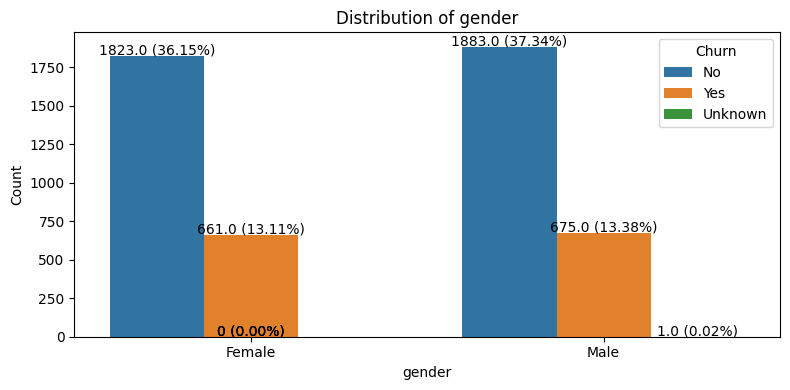

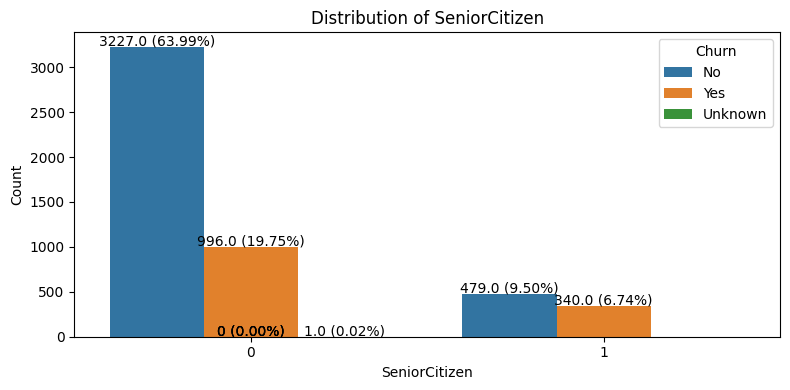

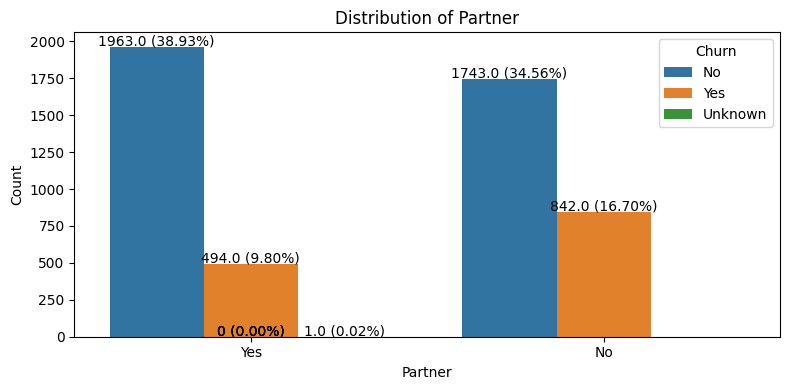

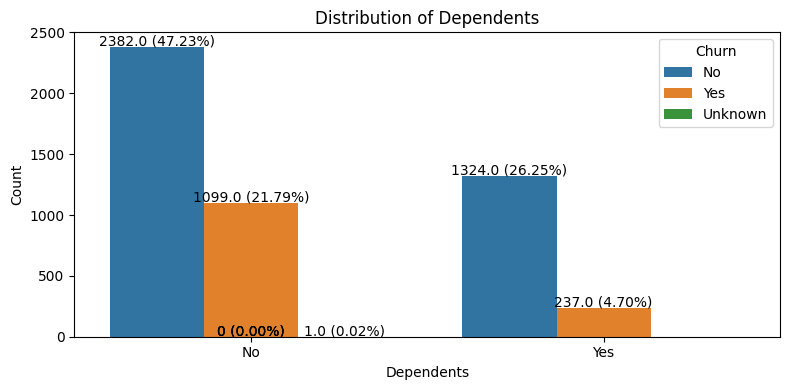

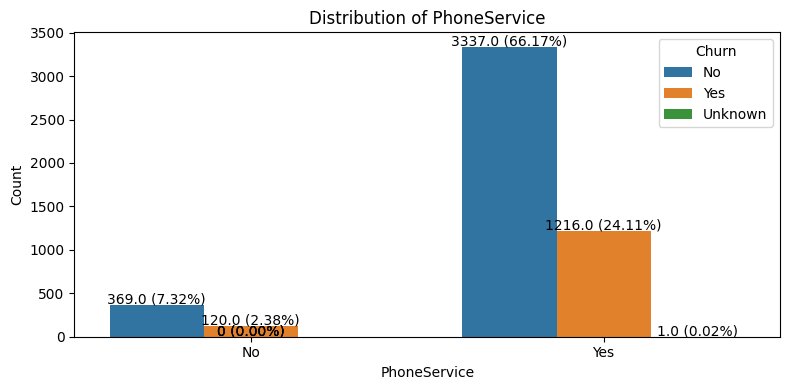

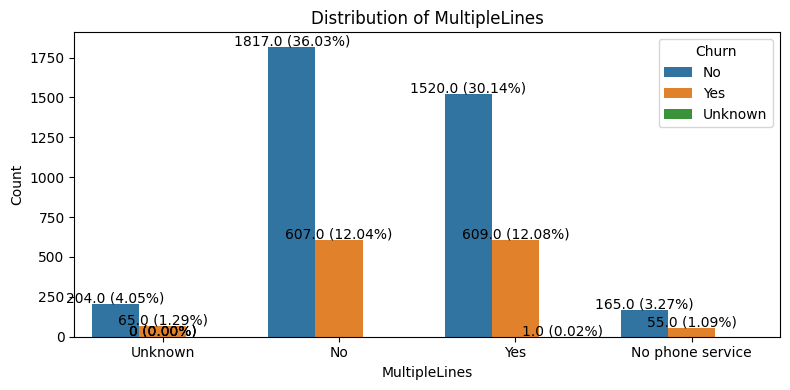

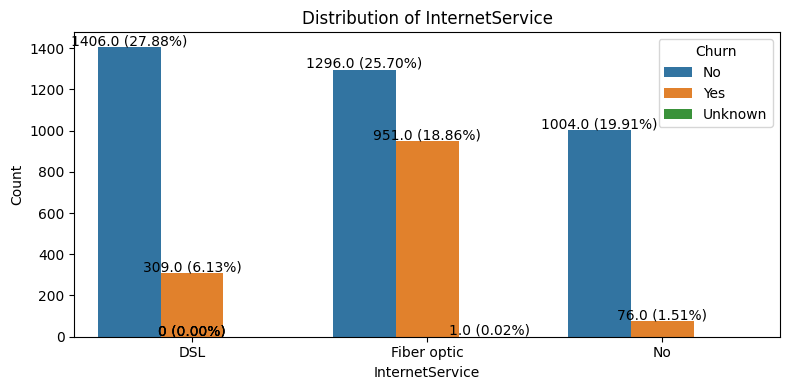

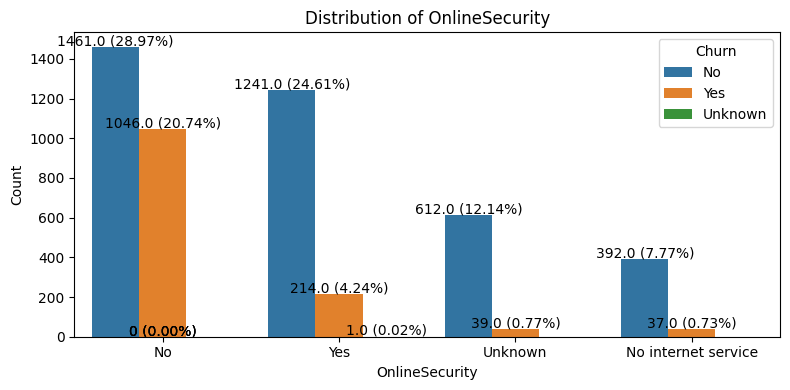

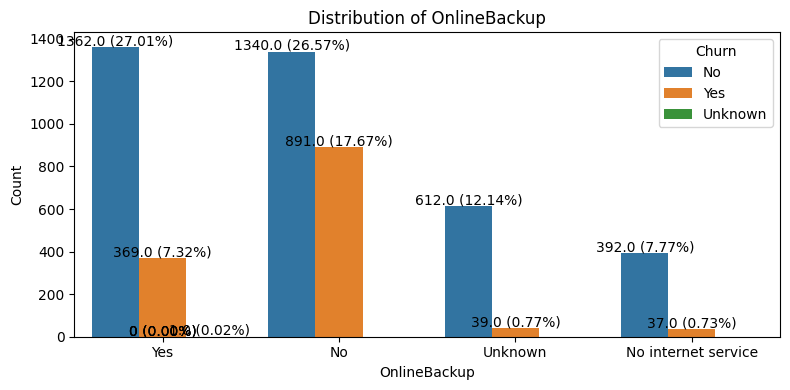

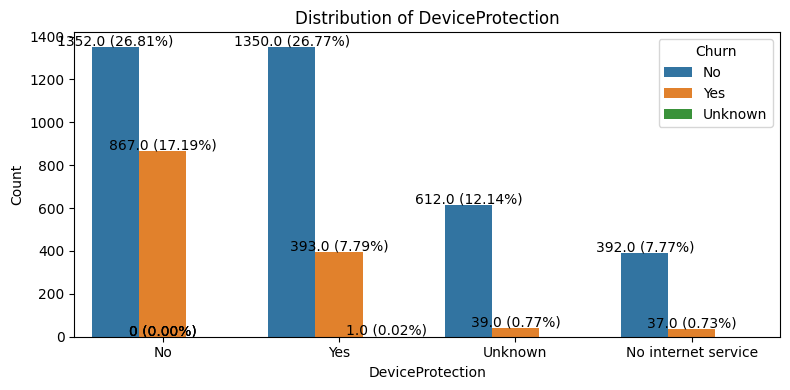

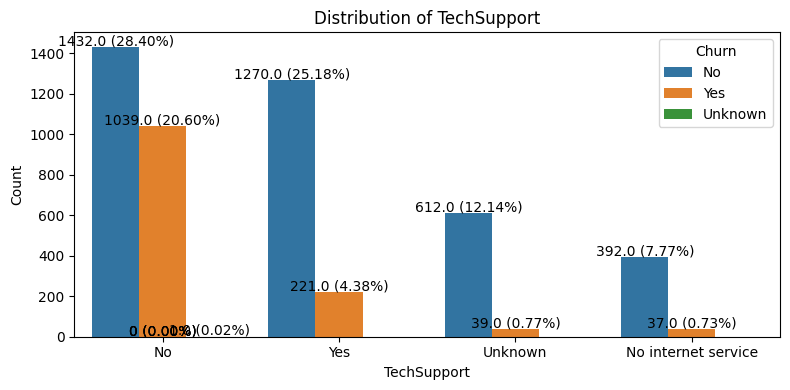

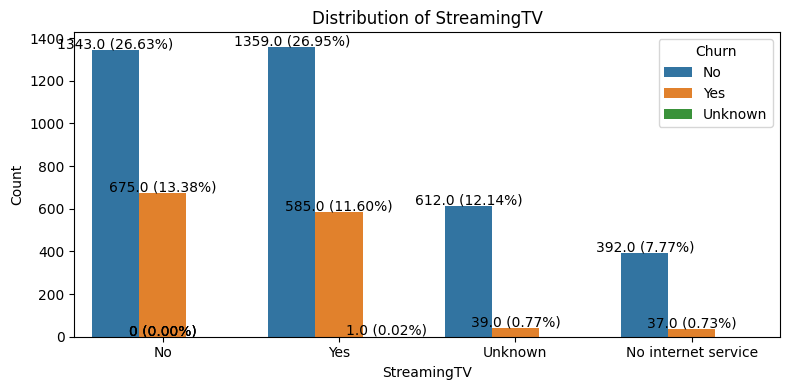

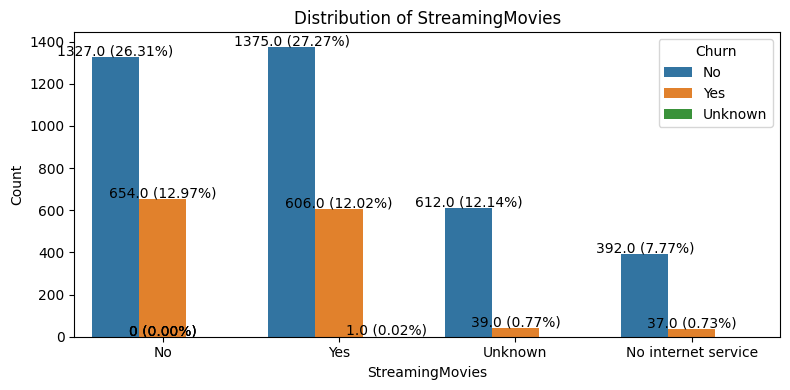

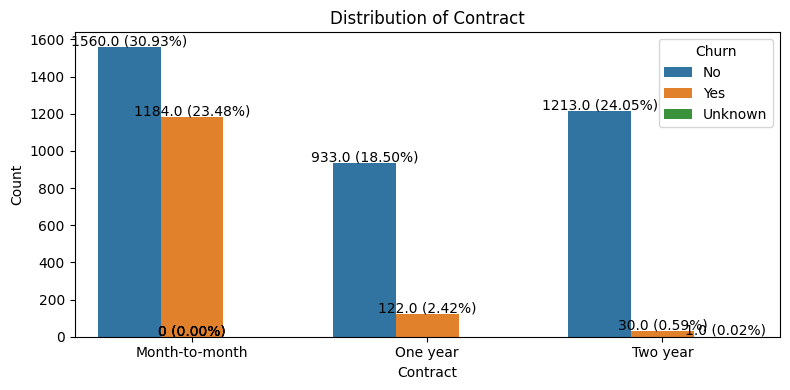

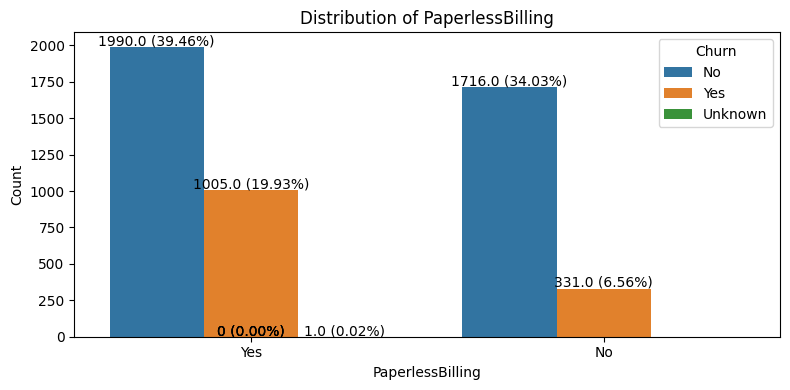

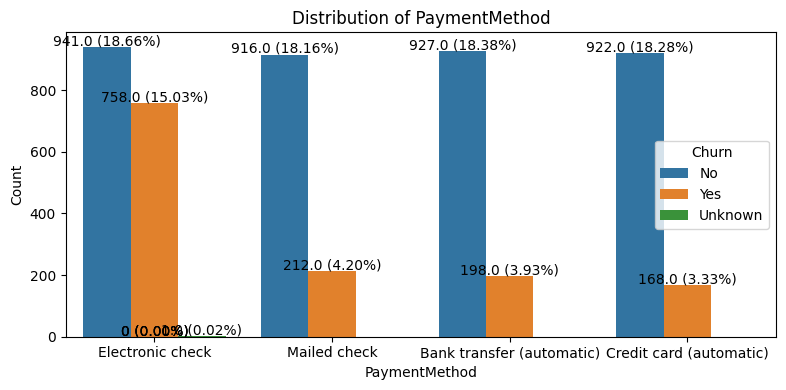

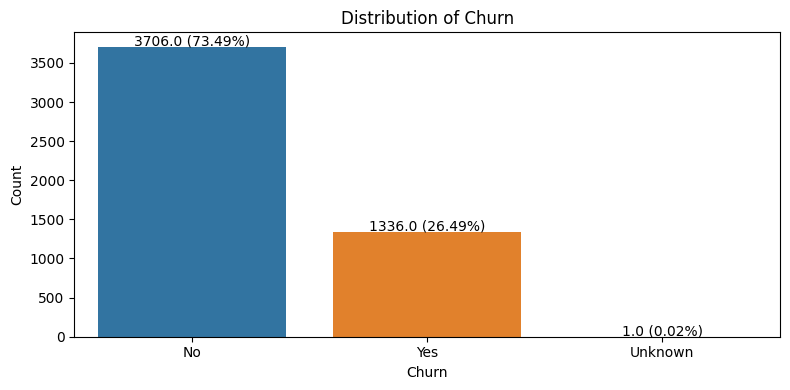

In [2578]:
# show the relationship between categorical columns and churn column

# List of categorical columns

cat_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Function to add labels with numbers and percentages to the plots

def add_labels(ax, total_count):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()} ({p.get_height()/total_count*100:.2f}%)', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 4), textcoords='offset points')

# Plotting univariate distributions for categorical variables

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Add labels with numbers and percentages
    add_labels(ax, df.shape[0])
    
    plt.tight_layout()
    plt.show()



# Convert Churn column to categorical type for correct ordering in the plot
df['Churn'] = df['Churn'].astype('category')

# Plotting the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Relationship between Churn and Monthly Charges')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='TotalCharges', data=df, palette='Set2')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.title('Relationship between Churn and Total Charges')
plt.grid(True)
plt.tight_layout()
plt.show()

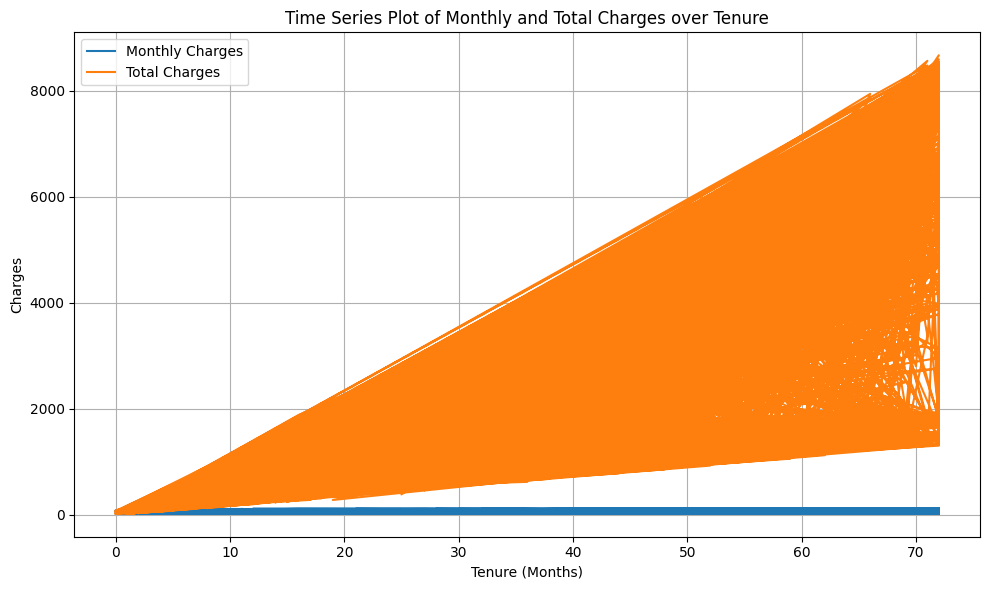

In [2580]:
# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(df['tenure'], df['MonthlyCharges'], label='Monthly Charges')
plt.plot(df['tenure'], df['TotalCharges'], label='Total Charges')
plt.xlabel('Tenure (Months)')
plt.ylabel('Charges')
plt.title('Time Series Plot of Monthly and Total Charges over Tenure')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_12236\2029529394.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Contract', y='tenure', data=df, palette='Set2')


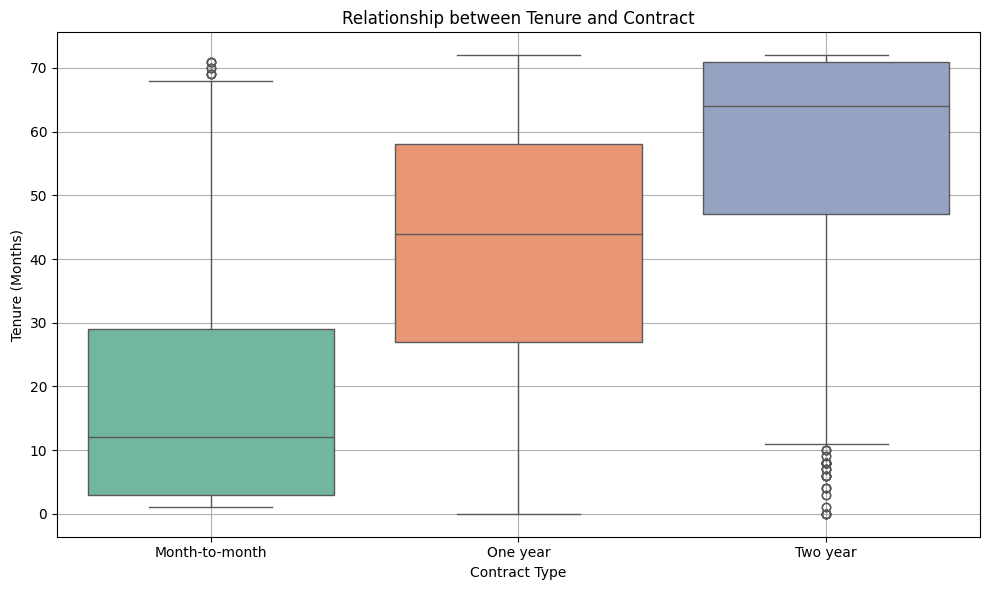

In [2581]:

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract', y='tenure', data=df, palette='Set2')
plt.xlabel('Contract Type')
plt.ylabel('Tenure (Months)')
plt.title('Relationship between Tenure and Contract')
plt.grid(True)
plt.tight_layout()
plt.show()


- Multi-variate Analysis   

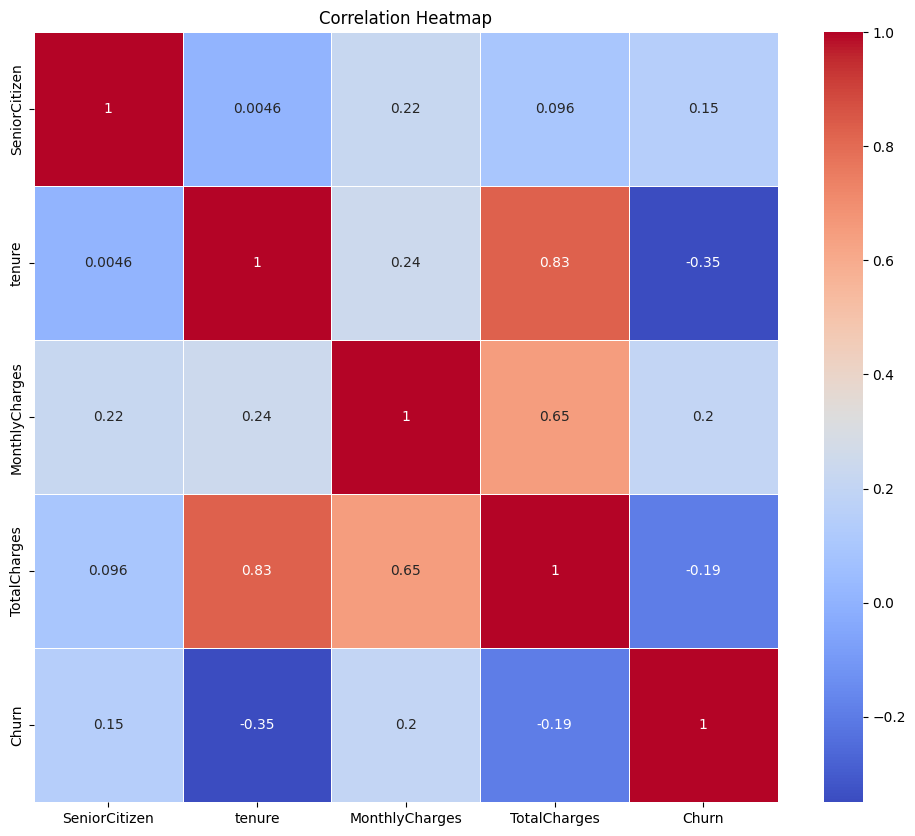

In [2582]:
# Convert 'Churn' column to numeric (0 for 'No', 1 for 'Yes')
df['Churn'] = df['Churn'].apply(lambda x: 0 if x == 'No' else 1)

# Select numeric columns only
numeric_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Compute the correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


 Answer Analytical questions with visulizations

- 1. What are the primary factors influencing customer churn?

By analyzing the relationships between various features (e.g., tenure, InternetService, Contract, MonthlyCharges, TotalCharges) and the Churn variable, you can identify the key drivers of customer churn. This information can help in developing targeted retention strategies.

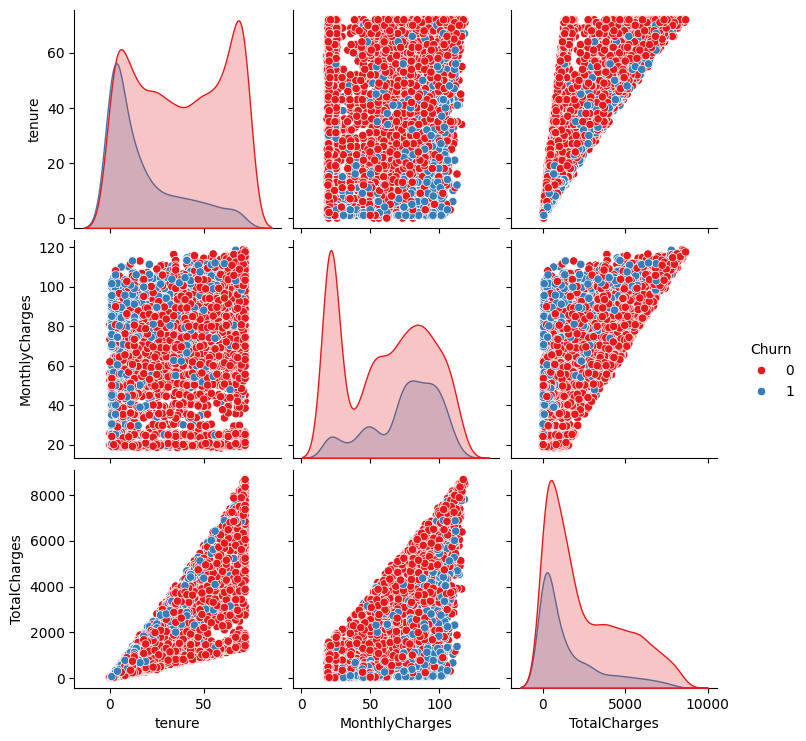

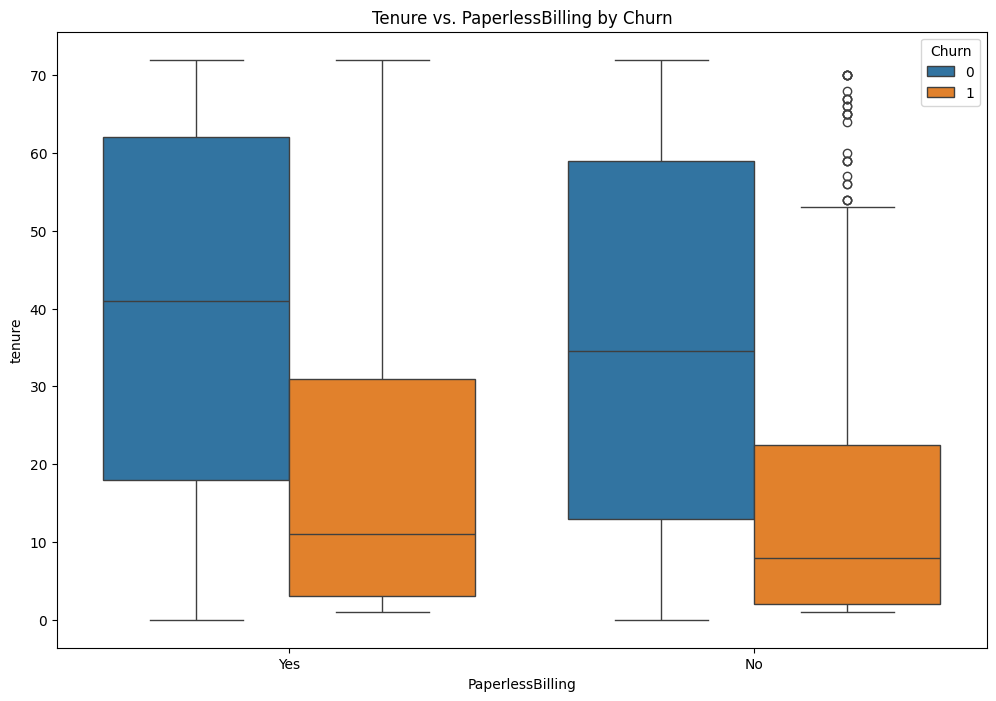

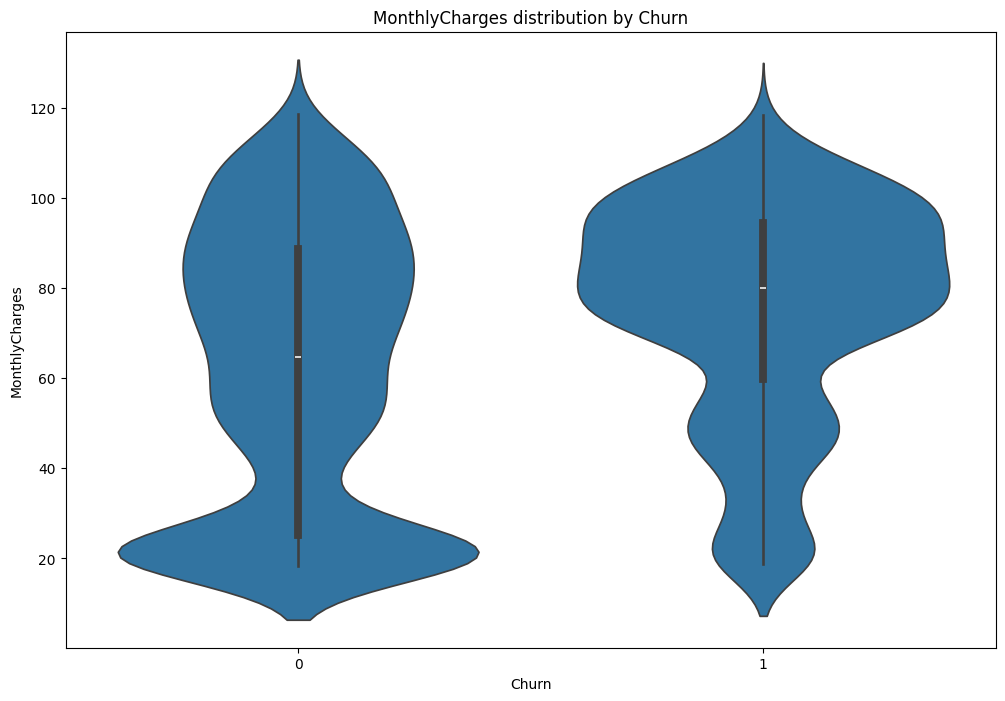

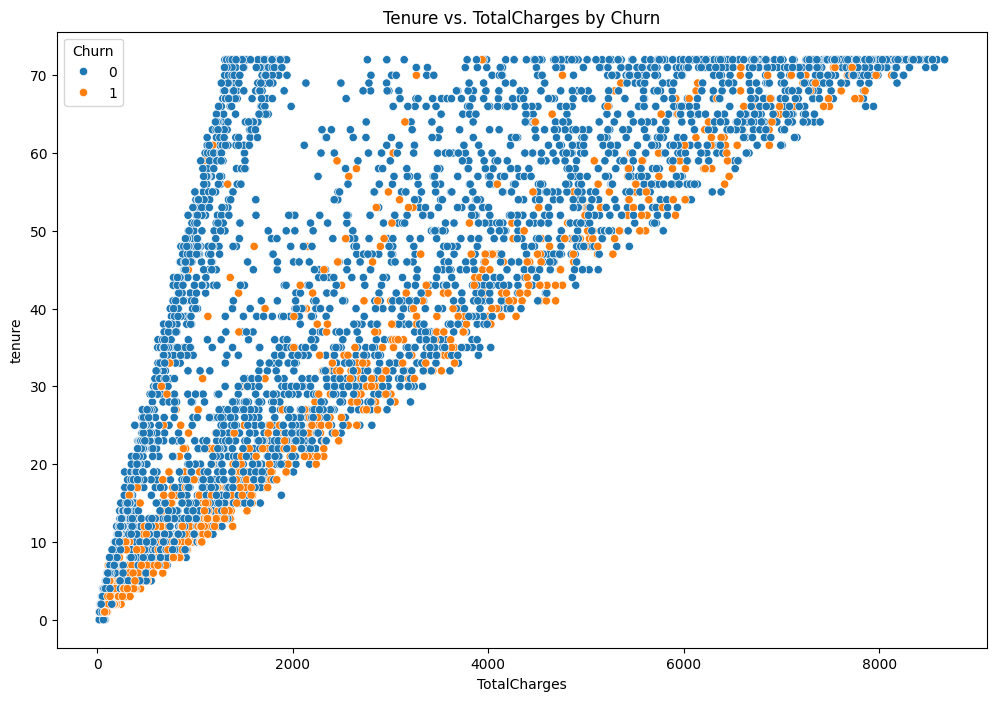

In [2583]:

# Select relevant columns for analysis
columns_of_interest = ['tenure', 'PaperlessBilling', 'Dependents', 'OnlineSecurity', 
                       'TechSupport', 'Contract', 'MonthlyCharges', 'TotalCharges', 'Churn']
df_subset = df[columns_of_interest]

# Visualize relationships using pairplot
sns.pairplot(df_subset, hue='Churn', palette='Set1')
plt.show()

# Boxplot for categorical variables
plt.figure(figsize=(12, 8))
sns.boxplot(x='PaperlessBilling', y='tenure', hue='Churn', data=df)
plt.title('Tenure vs. PaperlessBilling by Churn')
plt.show()

# Violin plot for numerical variables
plt.figure(figsize=(12, 8))
sns.violinplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('MonthlyCharges distribution by Churn')
plt.show()

# Scatter plot for numerical variables
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TotalCharges', y='tenure', hue='Churn', data=df)
plt.title('Tenure vs. TotalCharges by Churn')
plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_12236\2809205319.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.dropna(inplace=True)  # Example, you may have a different strategy for handling missing data


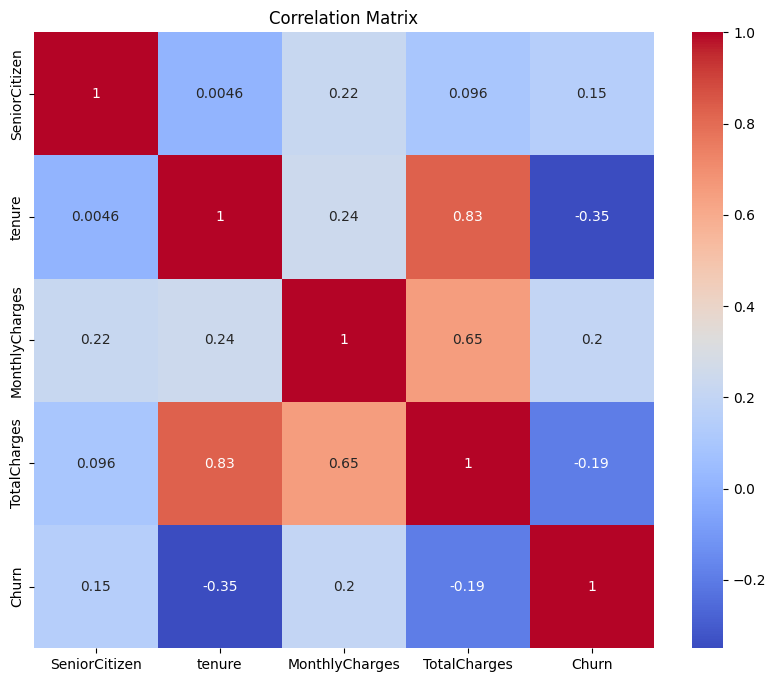

In [2584]:

# Drop non-numeric columns or columns with non-numeric values
numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

# Handle missing values if any
df_numeric.dropna(inplace=True)  # Example, you may have a different strategy for handling missing data

# Calculate correlation matrix for numeric columns
corr_matrix = df_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


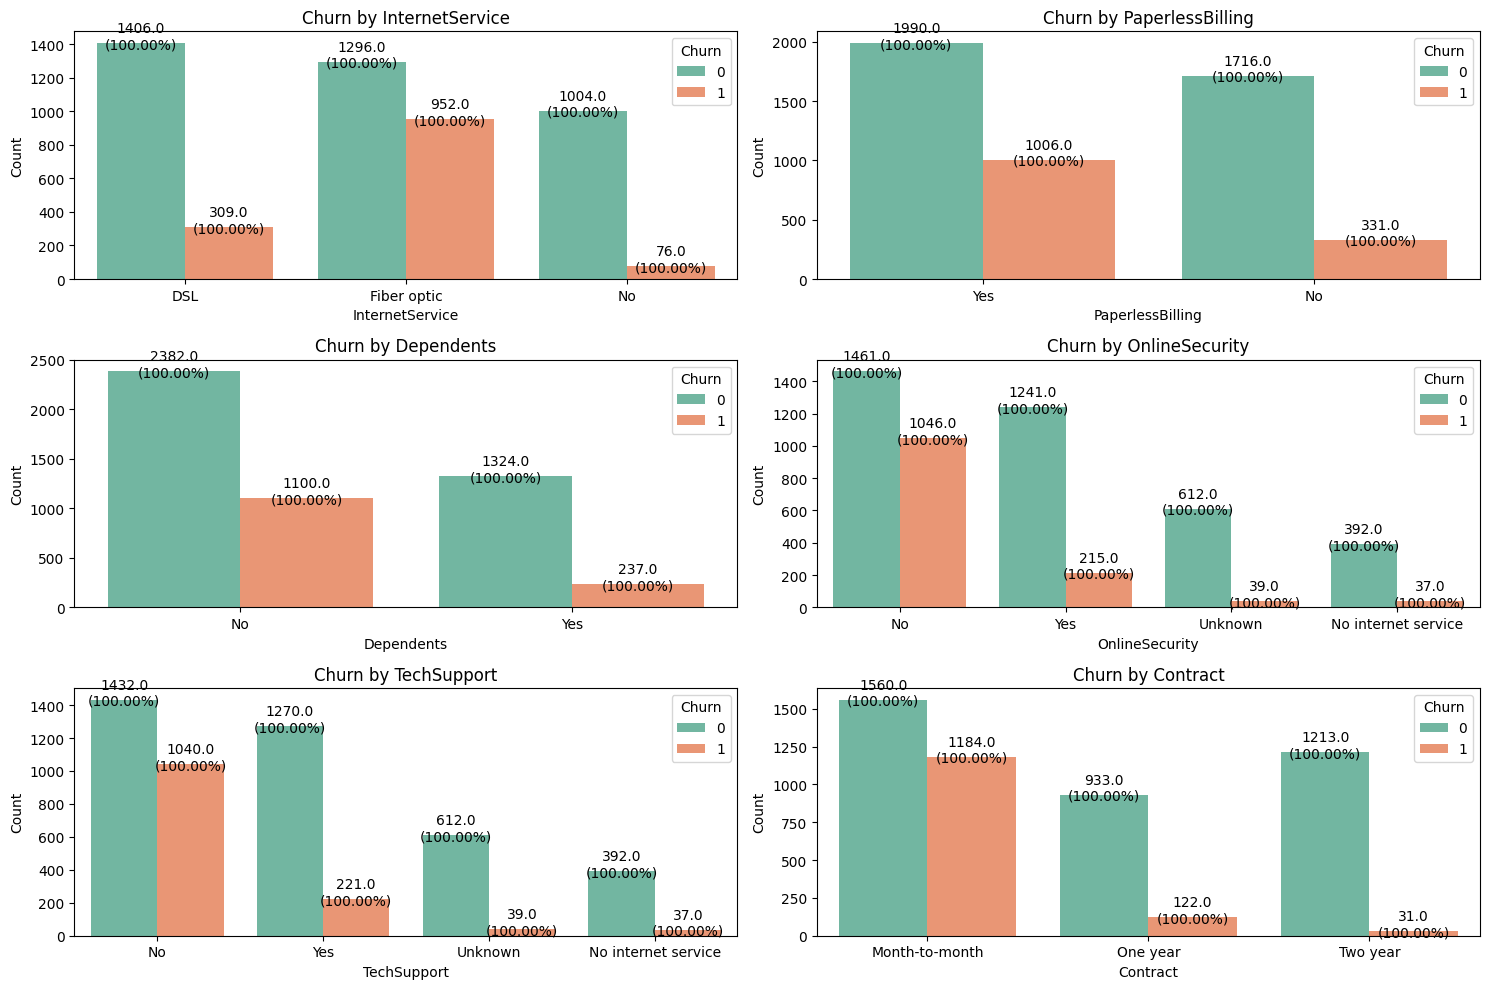

In [2585]:
# Assuming the correct column names are ['InternetService', 'PaperlessBilling', 'Dependents', 'OnlineSecurity', 
#                                       'TechSupport', 'Contract', 'Churn']
columns_of_interest = ['InternetService', 'PaperlessBilling', 'Dependents', 'OnlineSecurity', 
                       'TechSupport', 'Contract', 'Churn']

# Select relevant columns for analysis
df_subset = df[columns_of_interest]

# Plot stacked bar plots for each category
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

categories = ['InternetService', 'PaperlessBilling', 'Dependents', 'OnlineSecurity', 'TechSupport', 'Contract']

for i, cat in enumerate(categories):
    row = i // 2
    col = i % 2
    ax = sns.countplot(x=cat, hue='Churn', data=df, ax=axes[row, col], palette='Set2')
    axes[row, col].set_title(f'Churn by {cat}')
    axes[row, col].set_xlabel(cat)
    axes[row, col].set_ylabel('Count')
    
    # Add count labels and percentages
    for p in ax.patches:
        height = p.get_height()
        total = sum([patch.get_height() for patch in ax.patches if patch.get_x() == p.get_x()])
        if total > 0:  # Ensure total is not zero to avoid division by zero error
            percentage = f'{height/total:.2%}'
            ax.annotate(f'{height}\n({percentage})', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='center', xytext=(0, 5), 
                        textcoords='offset points')

plt.tight_layout()
plt.show()

- 2. How does the type of contract affect customer churn rates?

C:\Users\pc\AppData\Local\Temp\ipykernel_12236\1250481907.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage_label = f'{height/total_counts[int(x + width / 2)]:.2%}'


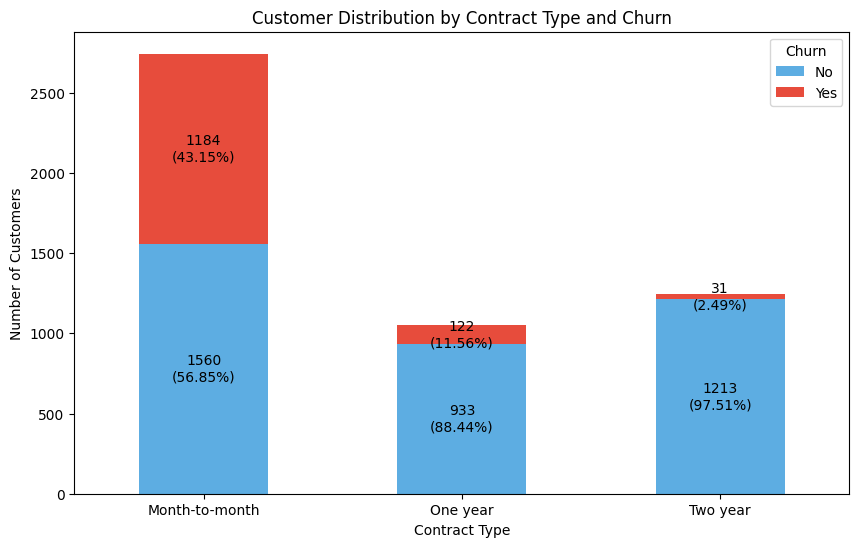

In [2586]:
# Create a crosstab to count the occurrences of churn and contract type
contract_churn = pd.crosstab(df['Contract'], df['Churn'])

# Calculate the total count for each contract type
total_counts = contract_churn.sum(axis=1)

# Calculate the percentage of churned customers for each contract type
churn_percentage = contract_churn.div(total_counts, axis=0) * 100

# Plot the stacked bar plot
ax = contract_churn.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#5DADE2', '#E74C3C'])

# Add labels with counts and percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0:
        count_label = f'{int(height)}'
        percentage_label = f'{height/total_counts[int(x + width / 2)]:.2%}'
        ax.annotate(f'{count_label}\n({percentage_label})', (x + width / 2, y + height / 2), 
                    ha='center', va='center', fontsize=10, color='black')

plt.title('Customer Distribution by Contract Type and Churn')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

- 3. What is the impact of payment method on customer retention?

C:\Users\pc\AppData\Local\Temp\ipykernel_12236\2242640464.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage_label = f'{height/total_counts[int(x + width / 2)]:.2%}'


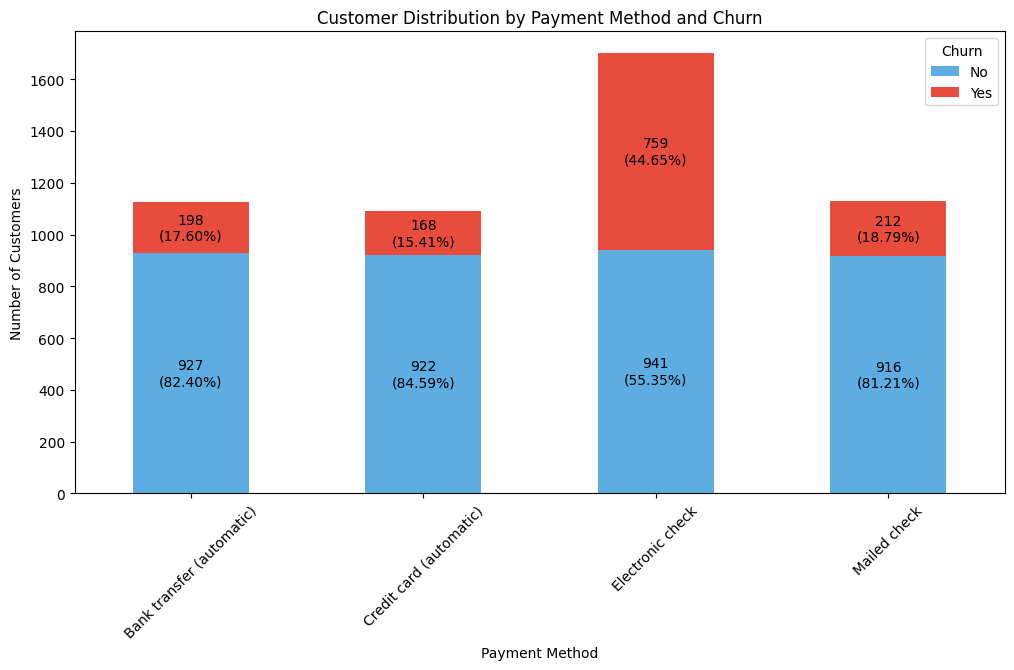

In [2587]:
# Create a crosstab to count the occurrences of churn and payment method
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'])

# Calculate the total count for each payment method
total_counts = payment_churn.sum(axis=1)

# Calculate the percentage of churned customers for each payment method
churn_percentage = payment_churn.div(total_counts, axis=0) * 100

# Plot the stacked bar plot
ax = payment_churn.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#5DADE2', '#E74C3C'])

# Add labels with counts and percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0:
        count_label = f'{int(height)}'
        percentage_label = f'{height/total_counts[int(x + width / 2)]:.2%}'
        ax.annotate(f'{count_label}\n({percentage_label})', (x + width / 2, y + height / 2), 
                    ha='center', va='center', fontsize=10, color='black')

plt.title('Customer Distribution by Payment Method and Churn')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

- 4. How does the tenure of a customer correlate with their monthly charges and churn rate?

C:\Users\pc\AppData\Local\Temp\ipykernel_12236\2809205319.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.dropna(inplace=True)  # Example, you may have a different strategy for handling missing data


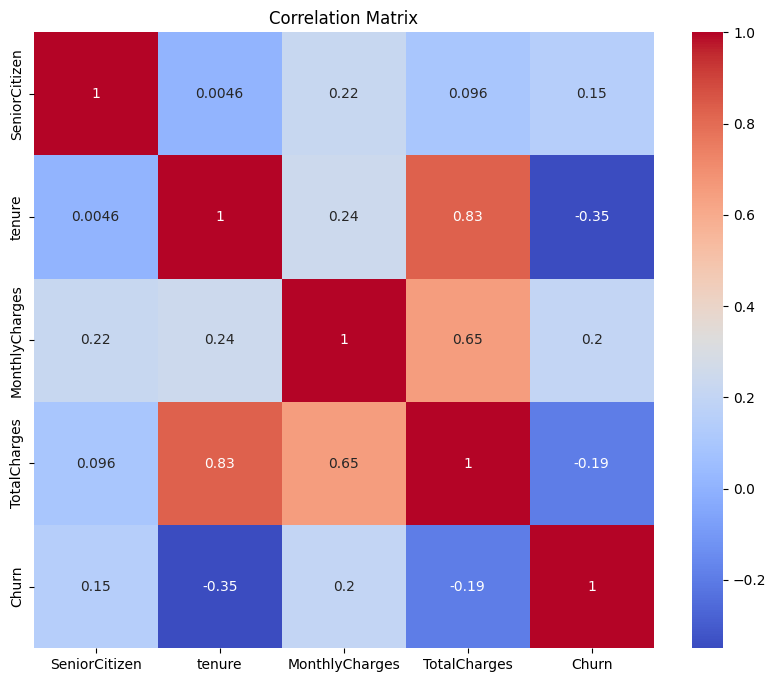

In [2588]:

# Drop non-numeric columns or columns with non-numeric values
numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

# Handle missing values if any
df_numeric.dropna(inplace=True)  # Example, you may have a different strategy for handling missing data

# Calculate correlation matrix for numeric columns
corr_matrix = df_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


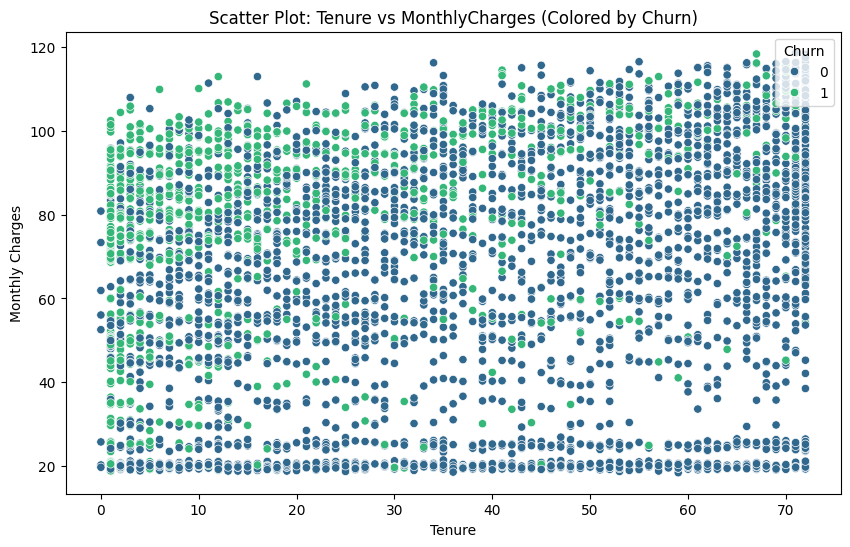

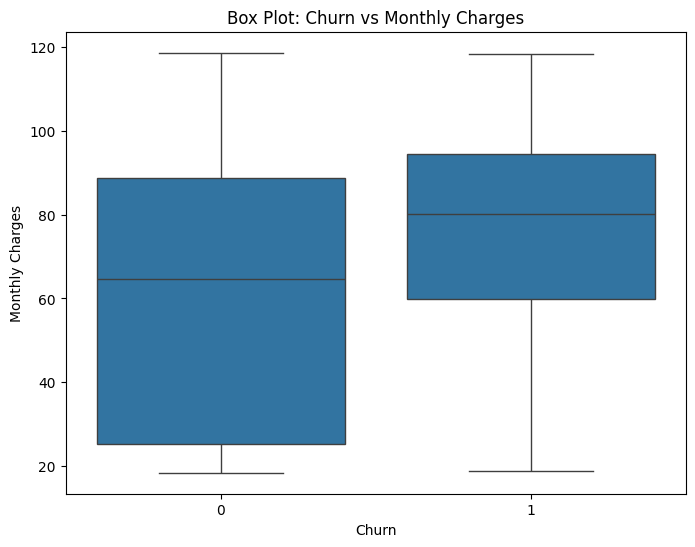

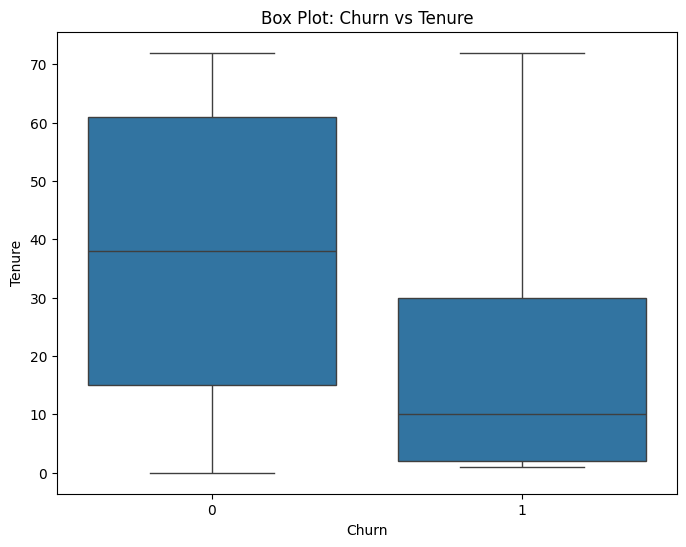

In [2589]:
# Scatter plot with hue (Churn)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df, palette='viridis')
plt.title('Scatter Plot: Tenure vs MonthlyCharges (Colored by Churn)')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn', loc='upper right')
plt.show()

# Box plot for Churn vs. MonthlyCharges
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Box Plot: Churn vs Monthly Charges')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

# Box plot for Churn vs. Tenure
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Box Plot: Churn vs Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

- 5. Which internet service type is most preferred by customers, and how does it relate to churn?

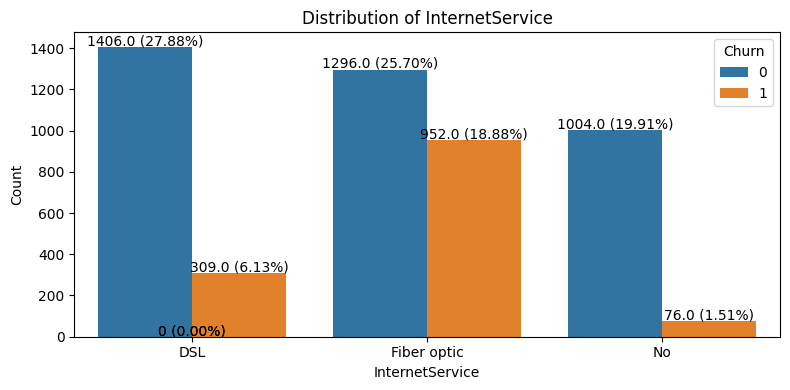

In [2593]:
# show the relationship between categorical columns and churn column

# List of categorical columns

cat_cols = [
    
    'InternetService', 
]

# Function to add labels with numbers and percentages to the plots

def add_labels(ax, total_count):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()} ({p.get_height()/total_count*100:.2f}%)', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 4), textcoords='offset points')

# Plotting univariate distributions for categorical variables

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Add labels with numbers and percentages
    add_labels(ax, df.shape[0])
    
    plt.tight_layout()
    plt.show()

##### Key Insights df
- There are unknown  value in  %,
TotalCharges 0.158636
MultipleLines        5.334127
OnlineSecurity      12.908983
OnlineBackup        12.908983
DeviceProtection    12.908983
TechSupport         12.908983
StreamingTV         12.908983
StreamingMovies     12.908983
TotalCharges         0.099147
Churn                0.019829

- Convert TotalCharges to Float (Datatype convertions)

- Categorical Variables:
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

 - Numerical Variables:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'] 

- No duplicated rows found in customerID column.

- data 2 has about 2043 rows, 21 columns, with more than 10 categorical columns which are like bools in data1 except  'MultipleLines' which are categorical
- the plots for SeniorCitizen, tenure and MonthlyCharges not uniformly distributed.

- The SeniorCitizen column appears to be a binary variable indicating whether a customer is a senior citizen (1) or not (0).
The mean value of approximately 0.162 indicates that about 16.2% of the customers are senior citizens.
The standard deviation is relatively high (0.369), suggesting significant variation in the distribution.
The quartiles (25%, 50%, 75%) are all 0, meaning that the majority of customers are not senior citizens.

- The tenure column represents the number of months a customer has stayed with the service.
The mean tenure is approximately 32.577 months, with a standard deviation of 24.530 months, indicating considerable variability among customers.
The median tenure is 29 months, meaning half of the customers have stayed less than 29 months.
The minimum tenure is 0 months, while the maximum tenure is 72 months (6 years).

-  The MonthlyCharges column indicates the monthly fee charged to customers.
The average monthly charge is $65.09, with a standard deviation of $30.07, reflecting a broad range of monthly fees.
The median monthly charge is $70.55, suggesting that half of the customers are paying more than this amount.
The range spans from a minimum of $18.40 to a maximum of $118.65.

-  The TotalCharges column represents the total amount charged to a customer over their tenure.
The mean total charge is $2302.06, with a high standard deviation of $2269.48, indicating wide variability.
The median total charge is $1401.15, implying that half of the customers have been charged less than this amount.
The minimum total charge is $18.80, while the maximum is $8670.10, showing a large range in total charges.
There are some missing values in this column since the count is slightly less (5035) compared to the other columns (5043).

- Under the tenure column,  0 means new contracts less than a month, thus no payents made hence blank TotalCharges, So to fill up the tenure column , it cld be approxmate to a month and Totalcharges would automatically be adjusted to MonthlyCharge.

- The TotalCharges  blank columns filled with MonthlyCharges since the tenure were 0 and not up to 1. Assumption that at least a month Tenure would give MonthlyCharges

### Data Preparation

### Modeling and Evaluation 